<a href="https://colab.research.google.com/github/Valepulidot/Proyectos/blob/main/Trabajo-predicci%C3%B3n-anemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicci√≥n de la anemia en el Per√∫




# Introducci√≥n

Enlace a la presentaci√≥n de canva: https://www.canva.com/design/DAGpzEUB6Ok/k8WB93nRSXVVvBcnbeAz7Q/edit?utm_content=DAGpzEUB6Ok&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

**¬øQu√© es la Anemia?**
La anemia es una condici√≥n en la que el n√∫mero de gl√≥bulos rojos o la concentraci√≥n de hemoglobina es menor que lo normal. Es especialmente prevalente en ni√±os menores de 5 a√±os y puede afectar significativamente su desarrollo cognitivo y f√≠sico.

**¬øC√≥mo ocurre?**
La anemia en ni√±os generalmente se debe a deficiencia de hierro, aunque tambi√©n puede ser causada por deficiencias nutricionales, infecciones parasitarias, o condiciones gen√©ticas.

**¬øPor qu√© este proyecto?**
La detecci√≥n temprana de anemia es crucial para el desarrollo infantil. Este proyecto busca crear un modelo de Machine Learning para predecir el riesgo de anemia en ni√±os peruanos, proporcionando una herramienta valiosa para la salud p√∫blica.

Preguntas a responder:
1. ¬øQu√© factores est√°n m√°s asociados con la anemia infantil?
3. ¬øC√≥mo influyen los factores prenatales en la anemia?
4. ¬øQu√© algoritmos de ML capturan mejor los patrones en este dataset?

# Descripci√≥n de los Datos



In [ ]:
#importar la fuente de datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Descargar librer√≠as requeridas

In [ ]:
# Librer√≠as Requeridas
import numpy as np # calculo numerico
import pandas as pd # analisis de datos
import os # trabajar con archivos
import warnings # Muestra advertencias
warnings.filterwarnings("ignore")

# Visualizaci√≥n de datos (graficosy figuras)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

# Estad√≠stica
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

# Configuraci√≥n de estilo
plt.style.use('ggplot')
sns.set_palette("husl")

Cargar la data

In [ ]:
print("\n### CARGA DE DATOS ###\n")

# Cargar el dataset
df = pd.read_csv("/content/drive/MyDrive/PROYECTO/Anemiadata.csv")

# Renombrar columnas para mejor legibilidad
column_mapping = {
    "CASEID": "caso",
    "HW1": "edad_meses",
    "HW2": "peso_kg",
    "HW3": "altura_cm",
    "M5": "meses_lactancia",
    "S432": "tiene_seguro",
    "QI422A_B": "anemia_embarazo",
    "QI422A_D": "hierro_embarazo",
    "S466": "control_crecimiento",
    "S466C": "num_controles",
    "B4": "genero",
    "Q220A": "duracion_embarazo",
    "anemia_dicho": "anemia_estado"
}
df = df.rename(columns=column_mapping)

print("Primeras 5 filas del dataset:")
print(df.head())


### CARGA DE DATOS ###

Primeras 5 filas del dataset:
                 caso  edad_meses  peso_kg  altura_cm meses_lactancia  \
0        325503101  2          43     15.0       96.2              17   
1        325504701  2          13      9.1       71.4              13   
2        325505001  1          19     11.9       80.2              19   
3        325508901  2          13     10.0       74.7              13   
4        325509701  2          18     11.2       79.5              18   

  tiene_seguro anemia_embarazo hierro_embarazo control_crecimiento  \
0           Si              No             NaN                  Si   
1           Si              No             NaN                  Si   
2           Si              No             NaN                  Si   
3           Si              No             NaN                  Si   
4           Si              No             NaN                  Si   

  num_controles     genero  duracion_embarazo    anemia_estado  
0            24   Fe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Dimensiones de los Datos
print(f'\nEl dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas')


El dataset tiene 17403 filas y 13 columnas


In [ ]:
# Tipos de Datos
print("\n### INFORMACI√ìN DE LOS DATOS ###")
print(df.info())


### INFORMACI√ìN DE LOS DATOS ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17403 entries, 0 to 17402
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caso                 17403 non-null  object 
 1   edad_meses           17403 non-null  int64  
 2   peso_kg              17403 non-null  float64
 3   altura_cm            17403 non-null  float64
 4   meses_lactancia      17403 non-null  object 
 5   tiene_seguro         17403 non-null  object 
 6   anemia_embarazo      16713 non-null  object 
 7   hierro_embarazo      4630 non-null   object 
 8   control_crecimiento  17372 non-null  object 
 9   num_controles        17372 non-null  object 
 10  genero               17403 non-null  object 
 11  duracion_embarazo    17403 non-null  int64  
 12  anemia_estado        17403 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.7+ MB
None




*   Variables numericas y categoricas, pero la mayor√≠a son categoricas.
*   Presenta valores faltantes.



In [ ]:
# Verificar Valores Faltantes
print("\n### VALORES FALTANTES ###")
print(df.isnull().sum())


### VALORES FALTANTES ###
caso                       0
edad_meses                 0
peso_kg                    0
altura_cm                  0
meses_lactancia            0
tiene_seguro               0
anemia_embarazo          690
hierro_embarazo        12773
control_crecimiento       31
num_controles             31
genero                     0
duracion_embarazo          0
anemia_estado              0
dtype: int64


In [ ]:
# Verificar Duplicados
duplicados = df[df.duplicated(keep=False)]
print(f"\nN√∫mero de filas duplicadas: {len(duplicados)}")


N√∫mero de filas duplicadas: 0


Verificar valores √∫nicos

In [ ]:
# Verificar Valores √önicos
print("\n### VALORES √öNICOS POR COLUMNA ###")
unique_values = pd.DataFrame({
    'Columna': df.columns,
    'Valores_Unicos': [df[col].nunique() for col in df.columns]
})
print(unique_values)


### VALORES √öNICOS POR COLUMNA ###
                Columna  Valores_Unicos
0                  caso           15860
1            edad_meses              54
2               peso_kg             245
3             altura_cm             560
4       meses_lactancia              62
5          tiene_seguro               3
6       anemia_embarazo               3
7       hierro_embarazo               3
8   control_crecimiento               3
9         num_controles              42
10               genero               2
11    duracion_embarazo               5
12        anemia_estado               2


# Preparaci√≥n para el An√°lisis Exploratorio (EDA)


In [ ]:
# Convertir variables a tipos apropiados
df['meses_lactancia'] = pd.to_numeric(df['meses_lactancia'], errors='coerce')
df['num_controles'] = pd.to_numeric(df['num_controles'], errors='coerce')

In [ ]:
# Crear variable objetivo binaria
df['tiene_anemia'] = df['anemia_estado'].map({
    'Sin anemia': 0,
    'Leve o Moderada': 1
}).fillna(0).astype(int)

In [ ]:
# Separar Variables (Num√©ricas y Categ√≥ricas)
variables_numericas = ["edad_meses", "peso_kg", "altura_cm", "duracion_embarazo",
                      "meses_lactancia", "num_controles"]
variables_categoricas = ["genero", "tiene_seguro", "anemia_embarazo",
                        "hierro_embarazo", "control_crecimiento", "tiene_anemia"]

print("\nVariables num√©ricas:", variables_numericas)
print("Variables categ√≥ricas:", variables_categoricas)


Variables num√©ricas: ['edad_meses', 'peso_kg', 'altura_cm', 'duracion_embarazo', 'meses_lactancia', 'num_controles']
Variables categ√≥ricas: ['genero', 'tiene_seguro', 'anemia_embarazo', 'hierro_embarazo', 'control_crecimiento', 'tiene_anemia']


Estadisticas descriptivas

In [ ]:
df_numeric = df[variables_numericas]
metrics = pd.DataFrame({
    'min': df_numeric.min(),
    'max': df_numeric.max(),
    'range': df_numeric.max() - df_numeric.min(),
    'mean': df_numeric.mean(),
    'median': df_numeric.median(),
    'std': df_numeric.std(),
    'skew': df_numeric.skew(),
    'kurtosis': df_numeric.kurtosis()
})
print(metrics.round(2))

                    min    max  range   mean  median    std  skew  kurtosis
edad_meses          6.0   59.0   53.0  32.31    32.0  15.62  0.01     -1.21
peso_kg             4.9   34.9   30.0  13.26    13.0   3.52  0.62      0.82
altura_cm          55.2  120.8   65.6  88.74    89.7  11.86 -0.16     -0.89
duracion_embarazo   5.0    9.0    4.0   8.77     9.0   0.51 -2.41      6.50
meses_lactancia     0.0   59.0   59.0  17.39    17.0   9.10  0.69      0.93
num_controles       0.0   40.0   40.0  14.40    14.0   6.90  0.24      0.03


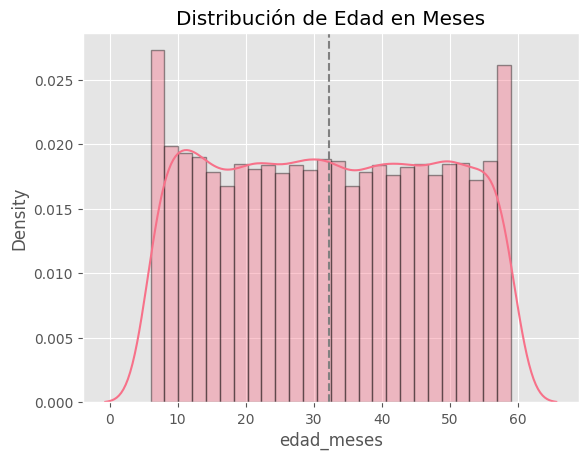

In [ ]:
sns.distplot(df['edad_meses'], hist_kws=dict(linewidth=1, edgecolor='k'))
plt.axvline(df['edad_meses'].mean(), color='grey', linestyle='--')
plt.title('Distribuci√≥n de Edad en Meses')
plt.show()

*   Se muestra una distribuci√≥n casi Uniforme, entre los 6 y 59 meses (aprox 5 a√±os) con ligeros picos en los extremos; lo que sugiere que hay una representaci√≥n equilibrada de todas las edades en este rango, aunque con cierta acumulaci√≥n en los l√≠mites inferior y superior.
*   La media (32.31) se acerca a la Mediana (32.0), indicando una distribuci√≥n sim√©trica. Asimismo, el sesgo es practicamente nulo confirmando la simetr√≠a. Por otro lado, la kurtosis (-1.21) es m√°s plana que una normal, lo que significa que los datos est√°n menos concentrados alrededor de la media y m√°s dispersos.

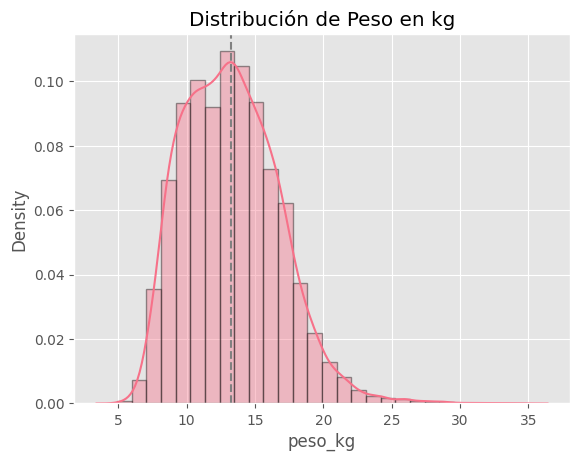

In [ ]:
sns.distplot(df['peso_kg'], hist_kws=dict(linewidth=1, edgecolor='k'), bins=28)
plt.axvline(df['peso_kg'].mean(), color='grey', linestyle='--')
plt.title('Distribuci√≥n de Peso en kg')
plt.show()

* Se muestra una distribuci√≥n casi simetrica que posee un marcado sesgo (0,62) a la derecha, con la mayor√≠a de los pesos concentrados entre 9 y 16 kg; pero con presencia de valores altos anomalos que forman dicho sesgo.
* La media (13.26) es cercana a la mediana (13.0) pero ligeramente inferior, confirmando el sesgo a la derecha.       

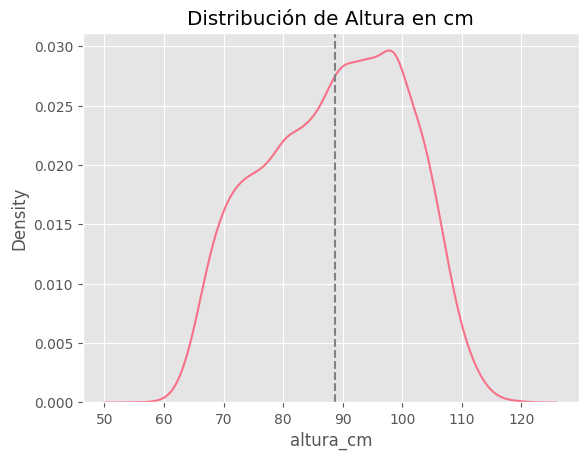

In [ ]:
sns.distplot(df['altura_cm'], hist=False)
plt.axvline(df['altura_cm'].mean(), color='grey', linestyle='--')
plt.title('Distribuci√≥n de Altura en cm')
plt.show()

* Se muestra una ligera asimetr√≠a con un sesgo (-0.16) hacia la izquierda, el cual el casi nulo, indicando poca variaci√≥n entre tallas.
* La media (88.74) y mediana (89.7) son muy cercanas con variacion minima, confirmando la ligera asimetria y el sesgo. Mientras que la kurtosis (-0,89) indica la dispersi√≥n de los datos y menor cantidad de ellos en los extremos

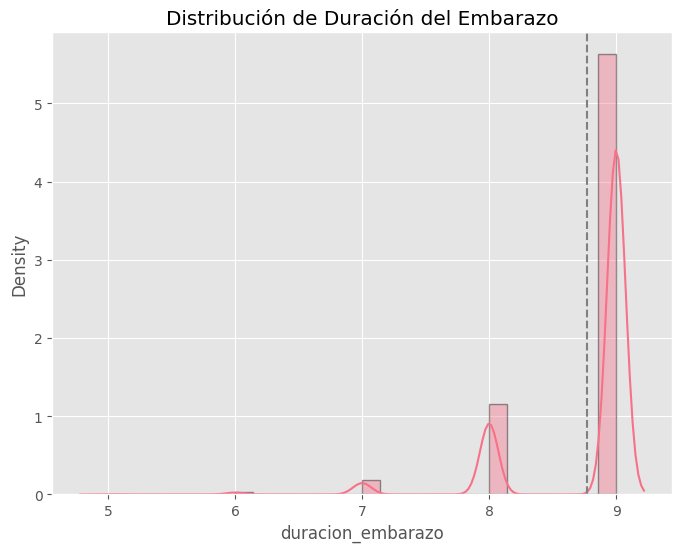

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df['duracion_embarazo'], hist_kws=dict(linewidth=1, edgecolor='k'), bins=28, ax=ax)
ax.axvline(df['duracion_embarazo'].mean(), color='grey', linestyle='--')
plt.title('Distribuci√≥n de Duraci√≥n del Embarazo')
plt.show()

* Se muestra un sesgo a la izquierda, con la mayor√≠a de los datos concentrados alrededor de los 9 meses y una cola extendida hacia valores m√°s bajos (5-7 meses), lo que refleja la presencia de embarazos prematuros menos frecuentes.

* La media (8.77) es ligeramente inferior a la mediana (9.0), confirmando el sesgo negativo (-2.41). La kurtosis (6.48) indica una distribuci√≥n m√°s puntiaguda que la normal, con una mayor concentraci√≥n de datos cerca de la media y colas m√°s pesadas.

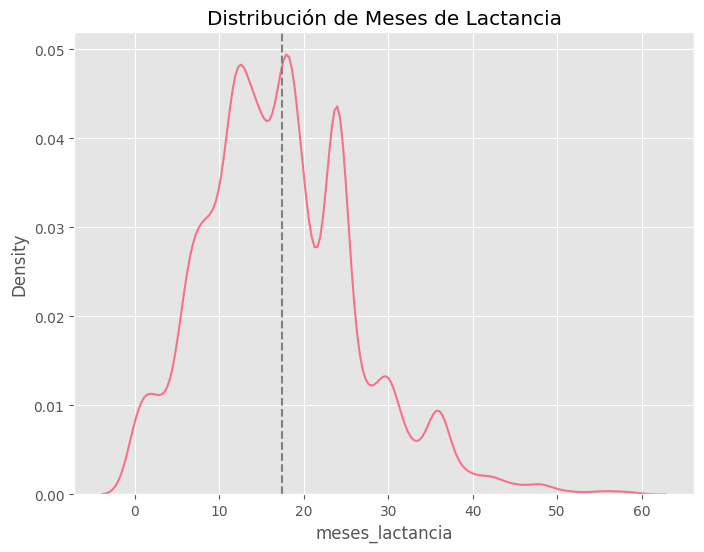

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df['meses_lactancia'], hist=False, ax=ax)
ax.axvline(df['meses_lactancia'].mean(), color='grey', linestyle='--')
plt.title('Distribuci√≥n de Meses de Lactancia')
plt.show()


*  Se muestra un sesgo moderado a la derecha, con la mayor√≠a de los datos agrupados cerca de los 17 meses y una cola extendida hacia valores m√°s altos (hasta 59 meses), indicando casos de lactancia prolongada.

* La media (17.39) y mediana (17.0) son cercanas, reflejando una distribuci√≥n relativamente equilibrada, aunque con un sesgo leve (0.69). La kurtosis (0.93) sugiere una forma cercana a la normal, pero con un ligero pico y colas menos pronunciadas.


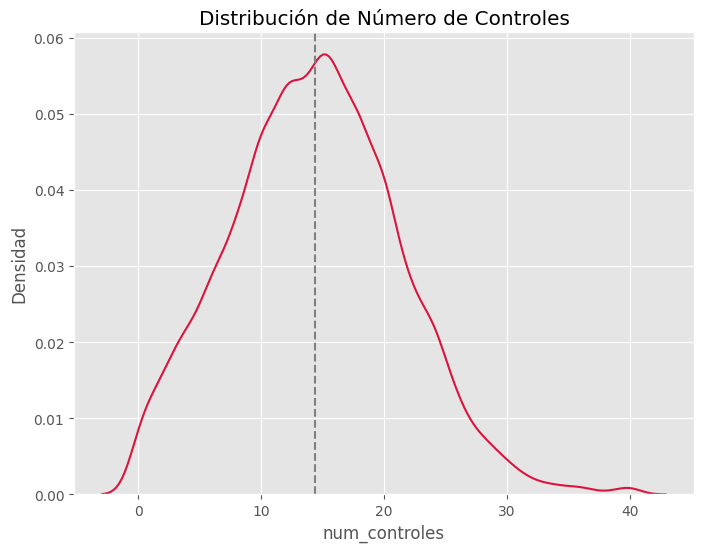

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(df['num_controles'], ax=ax, color='crimson')
ax.axvline(df['num_controles'].mean(), color='grey', linestyle='--')
plt.title('Distribuci√≥n de N√∫mero de Controles')
plt.xlabel('num_controles')
plt.ylabel('Densidad')
plt.show()

* Se muestra una distribuci√≥n casi sim√©trica, con los datos concentrados alrededor de 14 controles y una ligera cola hacia valores m√°s altos (hasta 40 controles), sugiriendo casos con mayor seguimiento m√©dico.

* La media (14.40) y mediana (14.0) son cercanas, confirmando la simetr√≠a (sesgo: 0.24). La kurtosis (0.03) indica una forma casi id√©ntica a la distribuci√≥n normal, con datos equilibrados y sin picos pronunciados.



# **An√°lisis Univariado EDA**



***NUM√âRICAS***


### DISTRIBUCI√ìN DE VARIABLES NUM√âRICAS ###


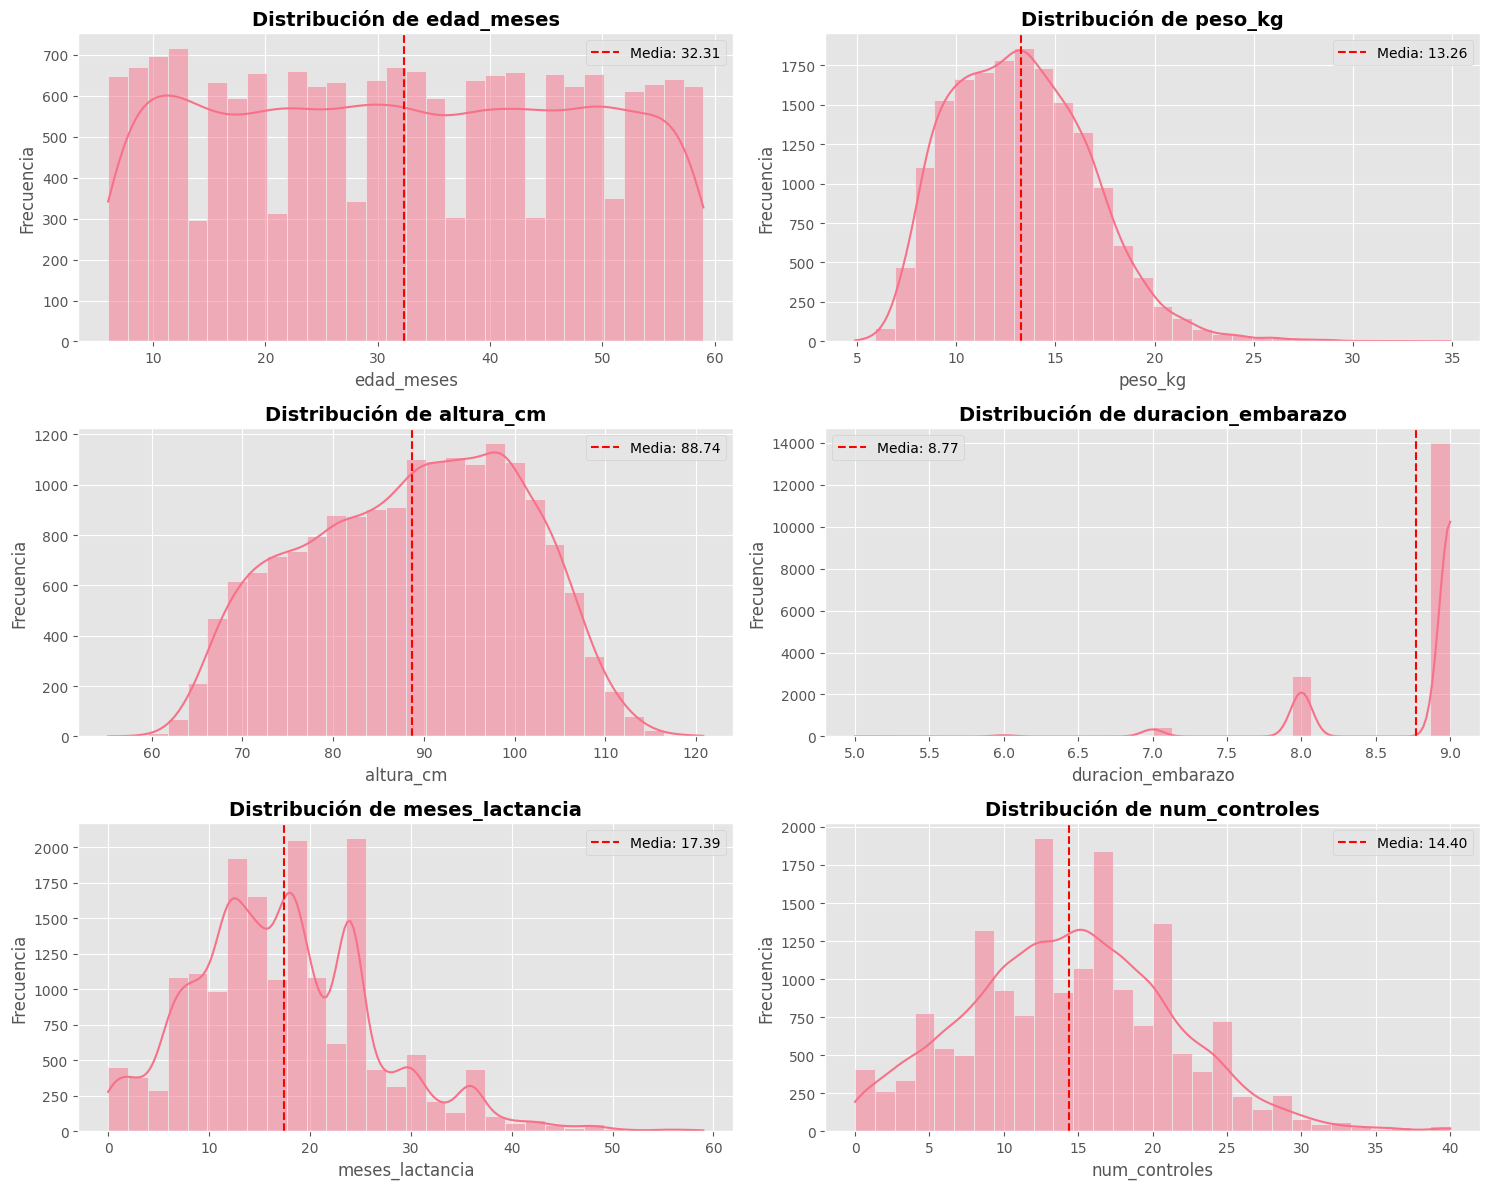

In [ ]:
# Variables Num√©ricas (An√°lisis con Distplot)
print("\n### DISTRIBUCI√ìN DE VARIABLES NUM√âRICAS ###")

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for i, var in enumerate(variables_numericas):
    sns.histplot(df[var].dropna(), kde=True, bins=30, ax=axes[i])
    axes[i].axvline(df[var].mean(), color='red', linestyle='--', label=f'Media: {df[var].mean():.2f}')
    axes[i].set_title(f'Distribuci√≥n de {var}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend()

plt.tight_layout()
plt.show()

**Distribuci√≥n de edad_meses**

* Presenta una distribuci√≥n uniforme con ligeras variaciones. La media es 32.31 meses, lo que indica que en promedio los ni√±os tienen aproximadamente 2 a√±os y medio.

**Distribuci√≥n de peso_kg**

* La cola derecha es larga, con algunos casos extremos por encima de 40 kg e incluso hasta 100 kg, lo que sugiere la presencia de valores at√≠picos o errores de ingreso.

* La distribuci√≥n es asim√©trica positiva (sesgo a la derecha), lo que debe considerarse para an√°lisis sensibles a outliers.

**Distribuci√≥n de altura_cm**

* La altura media registrada es de 89.53 cm, con una clara concentraci√≥n entre 60 y 110 cm, coherente con el desarrollo infantil.

**Distribuci√≥n de duraci√≥n_embarazo**

* La media de 8.77 meses y la concentraci√≥n entre 8.5 y 9 meses sugieren que la mayor√≠a de ni√±os nacieron a t√©rmino.

* Se identifican valores inferiores a 8 meses, lo que puede estar asociado a
partos prematuros, uno de los principales factores de riesgo para anemia infantil por menor reserva de hierro al nacer.

**Distribuci√≥n de meses_lactancia**

* La mayor√≠a de los ni√±os recibi√≥ lactancia por al menos 17 meses, lo cual es favorable, ya que una mayor duraci√≥n de lactancia se asocia con menor riesgo de anemia en la primera infancia.

* Tambi√©n hay casos con lactancia muy corta (‚â§3 meses), lo cual representa un factor de riesgo relevante para anemia por falta de hierro.

**Distribuci√≥n de num_controles**

* Los ni√±os tienen en promedio 14 controles pedi√°tricos, lo que refleja un seguimiento adecuado en la mayor√≠a de casos.

* Aquellos con muy pocos controles (<5) podr√≠an estar en mayor riesgo de anemia por falta de diagn√≥stico oportuna y ausencia de suplementaci√≥n preventiva.

***CATEG√ìRICAS***


### FRECUENCIA DE VARIABLES CATEG√ìRICAS ###


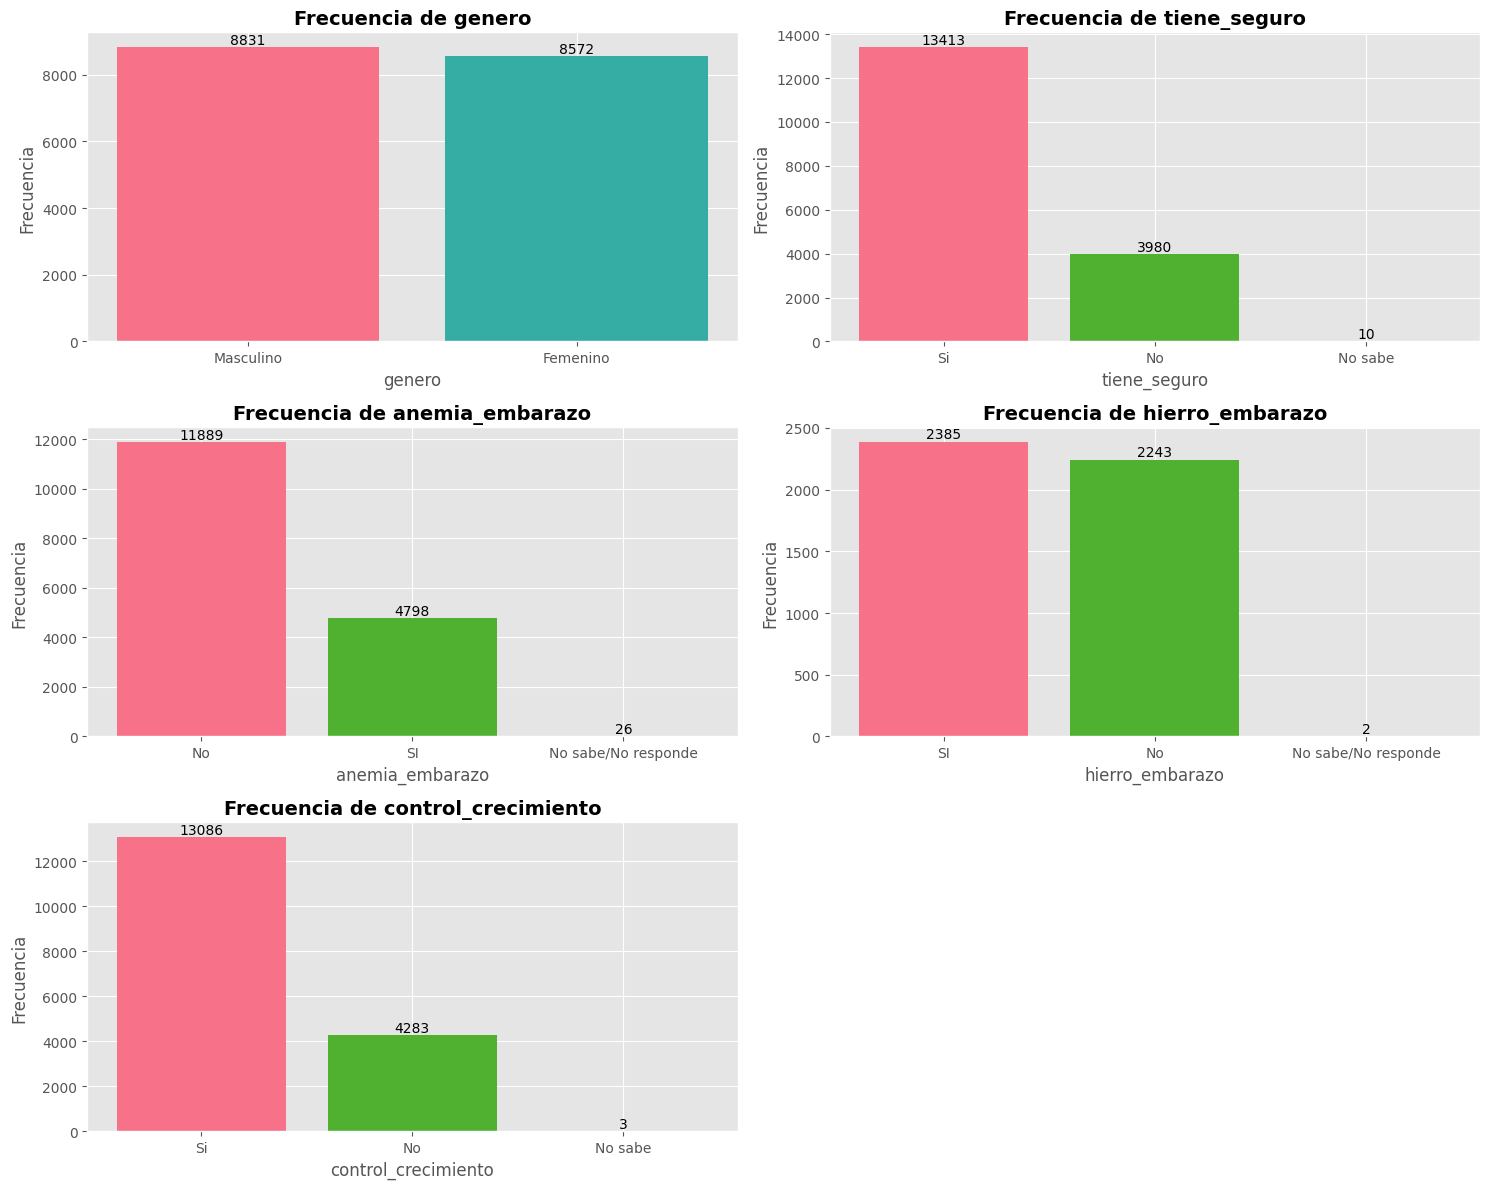

In [ ]:
# Variables Categ√≥ricas (An√°lisis con Gr√°ficos de Barras)
print("\n### FRECUENCIA DE VARIABLES CATEG√ìRICAS ###")

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for i, var in enumerate(variables_categoricas):
    if var != 'tiene_anemia':  # Excluimos la variable objetivo para an√°lisis posterior
        value_counts = df[var].value_counts()
        ax = axes[i]
        bars = ax.bar(range(len(value_counts)), value_counts.values,
                      color=sns.color_palette("husl", len(value_counts)))

        # A√±adir valores sobre las barras
        for j, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 5,
                   f'{value_counts.values[j]}', ha='center', va='bottom')

        ax.set_title(f'Frecuencia de {var}', fontsize=14, fontweight='bold')
        ax.set_xlabel(var)
        ax.set_ylabel('Frecuencia')
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels(value_counts.index)

# Ocultar el √∫ltimo subplot vac√≠o
axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

**Frecuencia del g√©nero**

* La distribuci√≥n es equilibrada: 50.8% masculino y 49.2% femenino, por lo tanto, no se espera sesgo de g√©nero en la ocurrencia de anemia.

**Frecuencia de tiene_seguro**  

* El 77% de los ni√±os cuenta con seguro de salud, lo cual facilita el acceso a controles y suplementaci√≥n preventiva contra la anemia.  
* El 23% restante no tiene seguro, representando un grupo vulnerable con mayor riesgo de diagn√≥stico tard√≠o o falta de tratamiento.

**Frecuencia de anemia_embarazo**  
* El 28.7% de las madres reportaron anemia durante el embarazo, un factor de riesgo clave para la anemia infantil, ya que afecta las reservas de hierro del feto.  
* La mayor√≠a (71.0%) no tuvo anemia, lo cual ayuda a contextualizar la carga heredada del problema.

**Frecuencia de hierro_embarazo**  
* Solo el 51.5% de las madres recibi√≥ suplementos de hierro durante el embarazo, mientras que el 48.5% no lo hizo.  
* Esta brecha en la atenci√≥n prenatal puede impactar directamente en la salud del ni√±o y elevar el riesgo de anemia.

**Frecuencia de control_crecimiento**  
* El 75.3% de los ni√±os tuvo controles de crecimiento, lo cual es favorable para la detecci√≥n y tratamiento temprano de la anemia.  
* Sin embargo, el 24.6% restante no accedi√≥ a estos controles, lo que evidencia un vac√≠o en la vigilancia pedi√°trica.

# **An√°lisis Bivariado EDA**


***Variables Num√©ricas vs Varibale objetivo***


### AN√ÅLISIS BIVARIADO - VARIABLES NUM√âRICAS ###


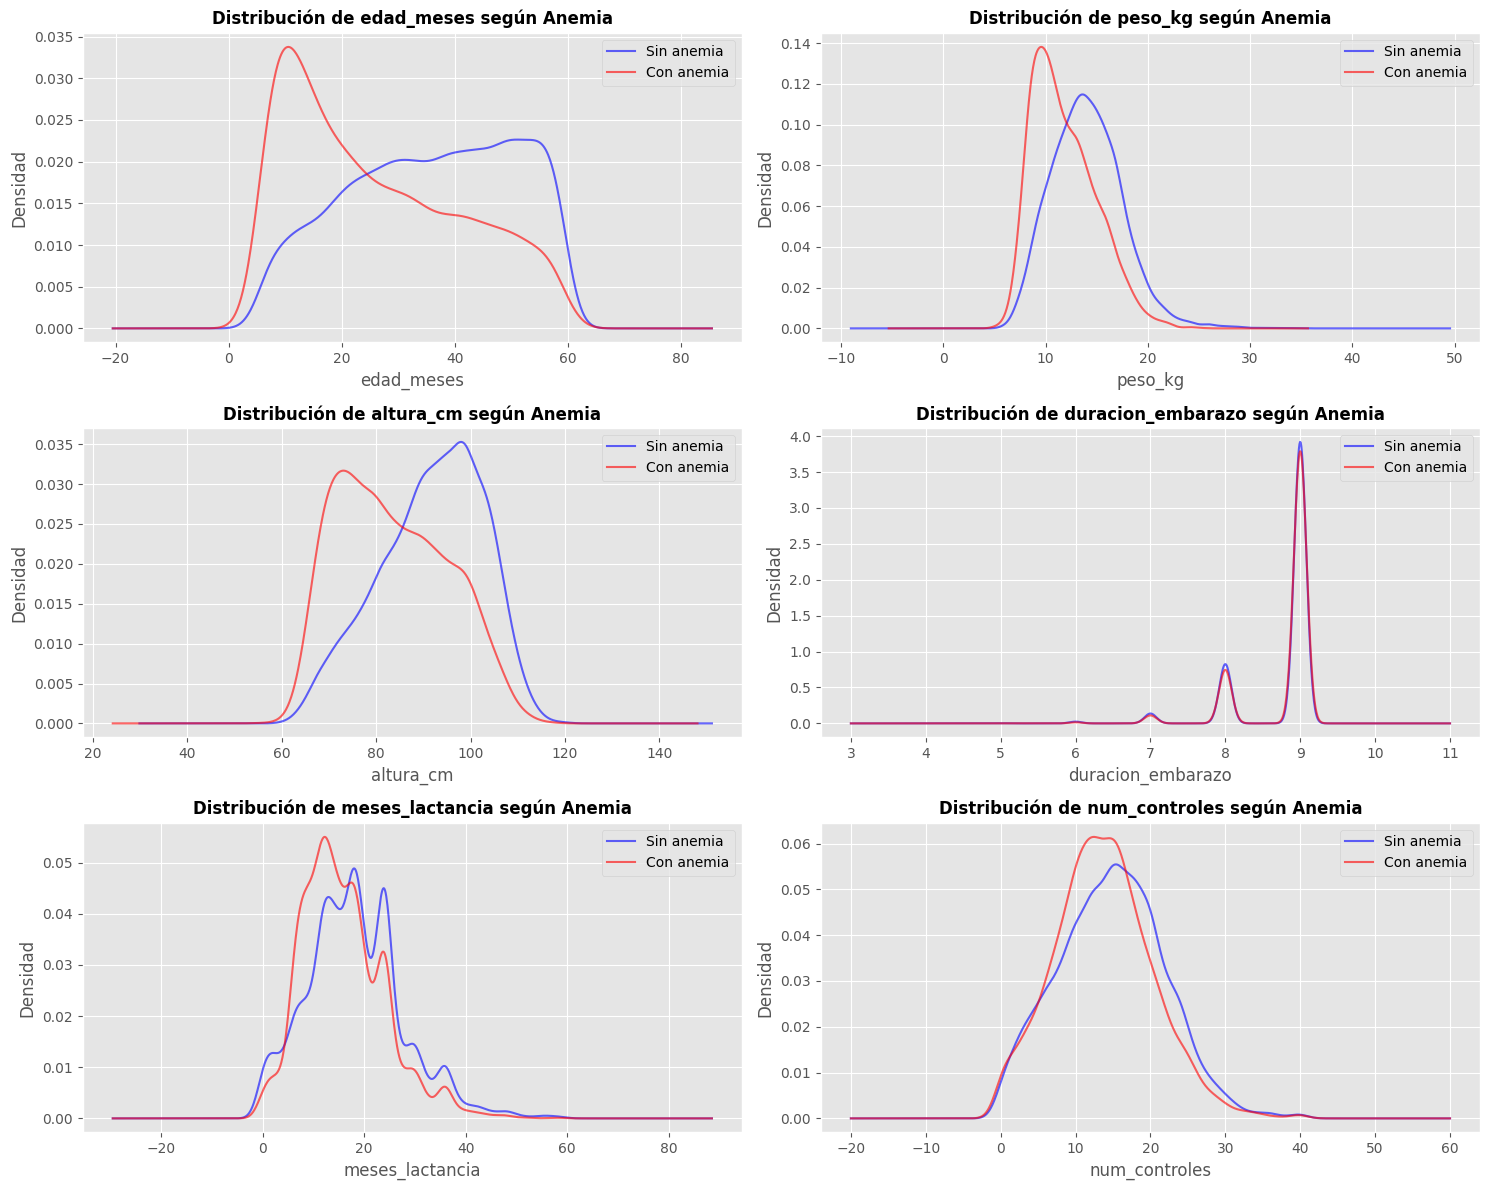


### CORRELACI√ìN CON ANEMIA ###
duracion_embarazo    0.021
num_controles       -0.075
meses_lactancia     -0.120
peso_kg             -0.302
edad_meses          -0.306
altura_cm           -0.332
Name: tiene_anemia, dtype: float64


In [ ]:
# Variables Num√©ricas vs Variable Objetivo
print("\n### AN√ÅLISIS BIVARIADO - VARIABLES NUM√âRICAS ###")

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for i, var in enumerate(variables_numericas):
    # KDE plot por grupo de anemia
    for anemia_val, label, color in [(0, 'Sin anemia', 'blue'), (1, 'Con anemia', 'red')]:
        data = df[df['tiene_anemia'] == anemia_val][var].dropna()
        data.plot.kde(ax=axes[i], label=label, color=color, alpha=0.6)

    axes[i].set_title(f'Distribuci√≥n de {var} seg√∫n Anemia', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Densidad')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Correlaci√≥n de variables num√©ricas con anemia
print("\n### CORRELACI√ìN CON ANEMIA ###")
correlaciones_num = df[variables_numericas + ['tiene_anemia']].corr()['tiene_anemia'][:-1].round(3)
print(correlaciones_num.sort_values(ascending=False))

**Edad en meses (-0.306)**  
* Es la variable con mayor correlaci√≥n inversa: los ni√±os m√°s peque√±os tienen mayor riesgo de anemia.  
* Refuerza que la anemia es m√°s prevalente en menores de 24 meses por su alta demanda de hierro.

**Peso en kg (-0.257)**  
* Existe una relaci√≥n moderadamente inversa: menor peso se asocia con mayor riesgo de anemia.  
* Indica influencia de la desnutrici√≥n aguda.

**Altura en cm (-0.143)**  
* Relaci√≥n inversa leve: menor talla se vincula con m√°s anemia.  
* Sugiere posible relaci√≥n con desnutrici√≥n cr√≥nica.

**Meses de lactancia (-0.119)**  
* Leve correlaci√≥n inversa: mayor duraci√≥n de lactancia se asocia con menor riesgo de anemia.  
* Refuerza su rol como factor protector.

**N√∫mero de controles (-0.075)**  
* Correlaci√≥n negativa d√©bil: m√°s controles m√©dicos se relacionan con menor anemia.  
* Sugiere impacto del seguimiento pedi√°trico, aunque no muy marcado.

**Duraci√≥n del embarazo (+0.022)**  
* Correlaci√≥n pr√°cticamente nula.  
* No se observa relaci√≥n significativa con anemia en este an√°lisis.

***Variables Categ√≥ricas vs Variable Objetivo***


### AN√ÅLISIS BIVARIADO - VARIABLES CATEG√ìRICAS ###


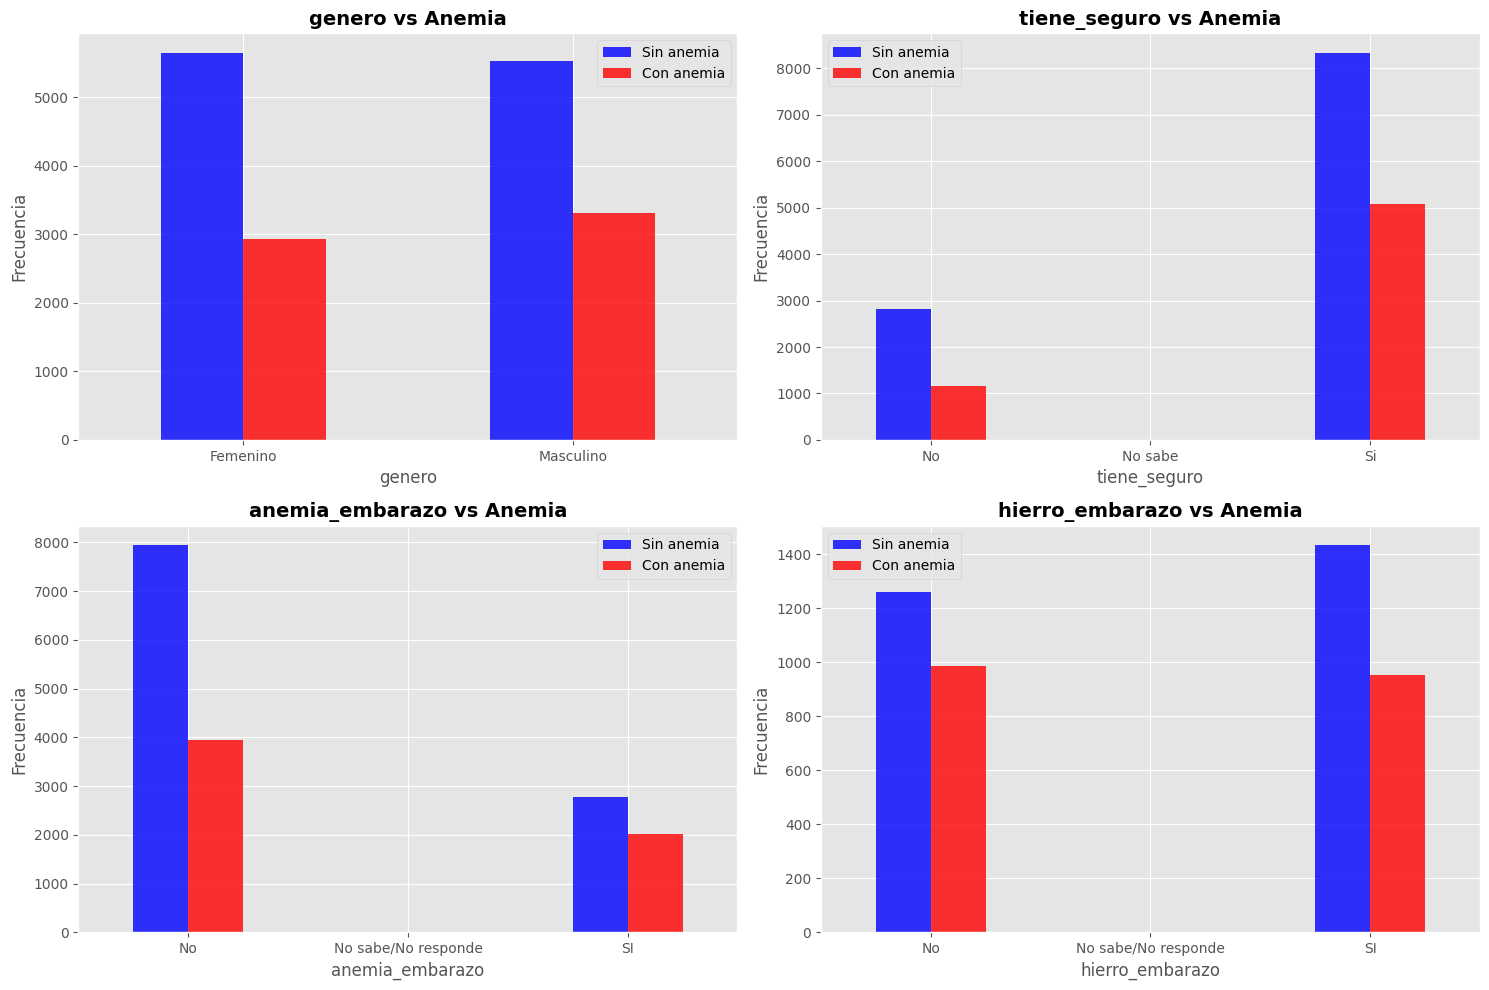

In [ ]:
# Variables Categ√≥ricas vs Variable Objetivo
print("\n### AN√ÅLISIS BIVARIADO - VARIABLES CATEG√ìRICAS ###")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

cat_vars_plot = ["genero", "tiene_seguro", "anemia_embarazo", "hierro_embarazo"]

for i, var in enumerate(cat_vars_plot):
    # Crear tabla de contingencia
    ct = pd.crosstab(df[var], df['tiene_anemia'])

    # Gr√°fico de barras agrupadas
    ct.plot(kind='bar', ax=axes[i], color=['blue', 'red'], alpha=0.8)
    axes[i].set_title(f'{var} vs Anemia', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend(['Sin anemia', 'Con anemia'])
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

***Correlaci√≥n_categ√≥rica***


### 4.2.3 MATRIZ DE CORRELACI√ìN ###
Valores √∫nicos de variables categ√≥ricas:
genero: {'Masculino': 8831, 'Femenino': 8572}
tiene_seguro: {'Si': 13413, 'No': 3980, 'No sabe': 10}
anemia_embarazo: {'No': 11889, 'SI': 4798, 'No sabe/No responde': 26}
hierro_embarazo: {'SI': 2385, 'No': 2243, 'No sabe/No responde': 2}
control_crecimiento: {'Si': 13086, 'No': 4283, 'No sabe': 3}

Valores NaN despu√©s del mapeo:
tiene_seguro: 10 valores NaN
anemia_embarazo: 716 valores NaN
hierro_embarazo: 12775 valores NaN
control_crecimiento: 34 valores NaN


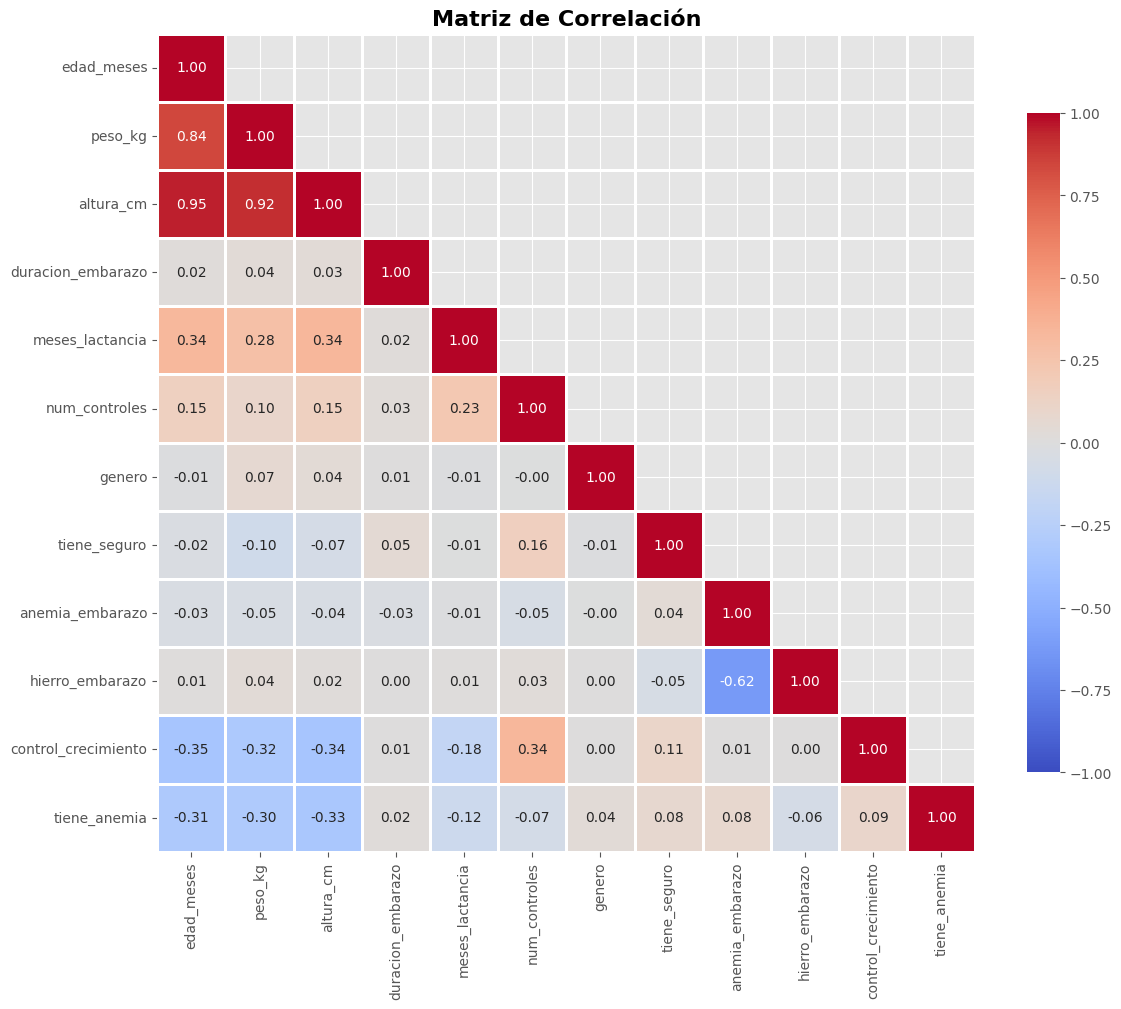


Correlaciones con 'tiene_anemia':
tiene_anemia           1.000000
control_crecimiento    0.094855
anemia_embarazo        0.081107
tiene_seguro           0.076572
genero                 0.035015
duracion_embarazo      0.021321
hierro_embarazo       -0.064779
num_controles         -0.074781
meses_lactancia       -0.119596
peso_kg               -0.302074
edad_meses            -0.306492
altura_cm             -0.332108
Name: tiene_anemia, dtype: float64


In [ ]:
# 4.2.3 Matriz de Correlaci√≥n (Heatmap)
print("\n### 4.2.3 MATRIZ DE CORRELACI√ìN ###")

# Preparar datos para correlaci√≥n
df_corr = df.copy()

# Primero, veamos los valores √∫nicos de cada variable categ√≥rica
print("Valores √∫nicos de variables categ√≥ricas:")
for col in ['genero', 'tiene_seguro', 'anemia_embarazo', 'hierro_embarazo', 'control_crecimiento']:
    if col in df_corr.columns:
        print(f"{col}: {df_corr[col].value_counts().to_dict()}")

# Convertir categ√≥ricas a num√©ricas de forma m√°s robusta
# Mapeo gen√©rico para variables Yes/No
yes_no_mapping = {'Yes': 1, 'No': 0, 'yes': 1, 'no': 0,
                  'YES': 1, 'NO': 0, 'Si': 1, 'No': 0,
                  'SI': 1, 'S√ç': 1, 's√≠': 1, 'si': 1}

# Mapeo para g√©nero
gender_mapping = {'Male': 1, 'Female': 0, 'male': 1, 'female': 0,
                  'M': 1, 'F': 0, 'Masculino': 1, 'Femenino': 0,
                  'Hombre': 1, 'Mujer': 0}

# Aplicar los mapeos
if 'genero' in df_corr.columns:
    df_corr['genero'] = df_corr['genero'].map(gender_mapping)

for col in ['tiene_seguro', 'anemia_embarazo', 'hierro_embarazo', 'control_crecimiento']:
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].map(yes_no_mapping)

# Verificar si hay valores NaN despu√©s del mapeo
print("\nValores NaN despu√©s del mapeo:")
for col in ['genero', 'tiene_seguro', 'anemia_embarazo', 'hierro_embarazo', 'control_crecimiento']:
    if col in df_corr.columns:
        nan_count = df_corr[col].isna().sum()
        if nan_count > 0:
            print(f"{col}: {nan_count} valores NaN")
            # Llenar NaN con el valor m√°s frecuente (moda)
            mode_value = df[col].mode()[0]
            mapped_mode = yes_no_mapping.get(mode_value, 0) if col != 'genero' else gender_mapping.get(mode_value, 0)
            df_corr[col].fillna(mapped_mode, inplace=True)

# Crear matriz de correlaci√≥n solo con columnas v√°lidas
cols_for_correlation = []
for col in variables_numericas + ['genero', 'tiene_seguro', 'anemia_embarazo',
                                  'hierro_embarazo', 'control_crecimiento', 'tiene_anemia']:
    if col in df_corr.columns and df_corr[col].notna().any():
        cols_for_correlation.append(col)

# Crear matriz de correlaci√≥n
plt.figure(figsize=(12, 10))
correlation_matrix = df_corr[cols_for_correlation].corr()

# Crear m√°scara para tri√°ngulo superior
mask = np.triu(np.ones_like(correlation_matrix), k=1)

# Heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.title('Matriz de Correlaci√≥n', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
# Mostrar correlaciones con la variable objetivo
print("\nCorrelaciones con 'tiene_anemia':")
correlations_with_target = correlation_matrix['tiene_anemia'].sort_values(ascending=False)
print(correlations_with_target)

# Preparaci√≥n de datos


### AN√ÅLISIS DE OUTLIERS ###

1. VISUALIZACI√ìN COMPARATIVA DE OUTLIERS


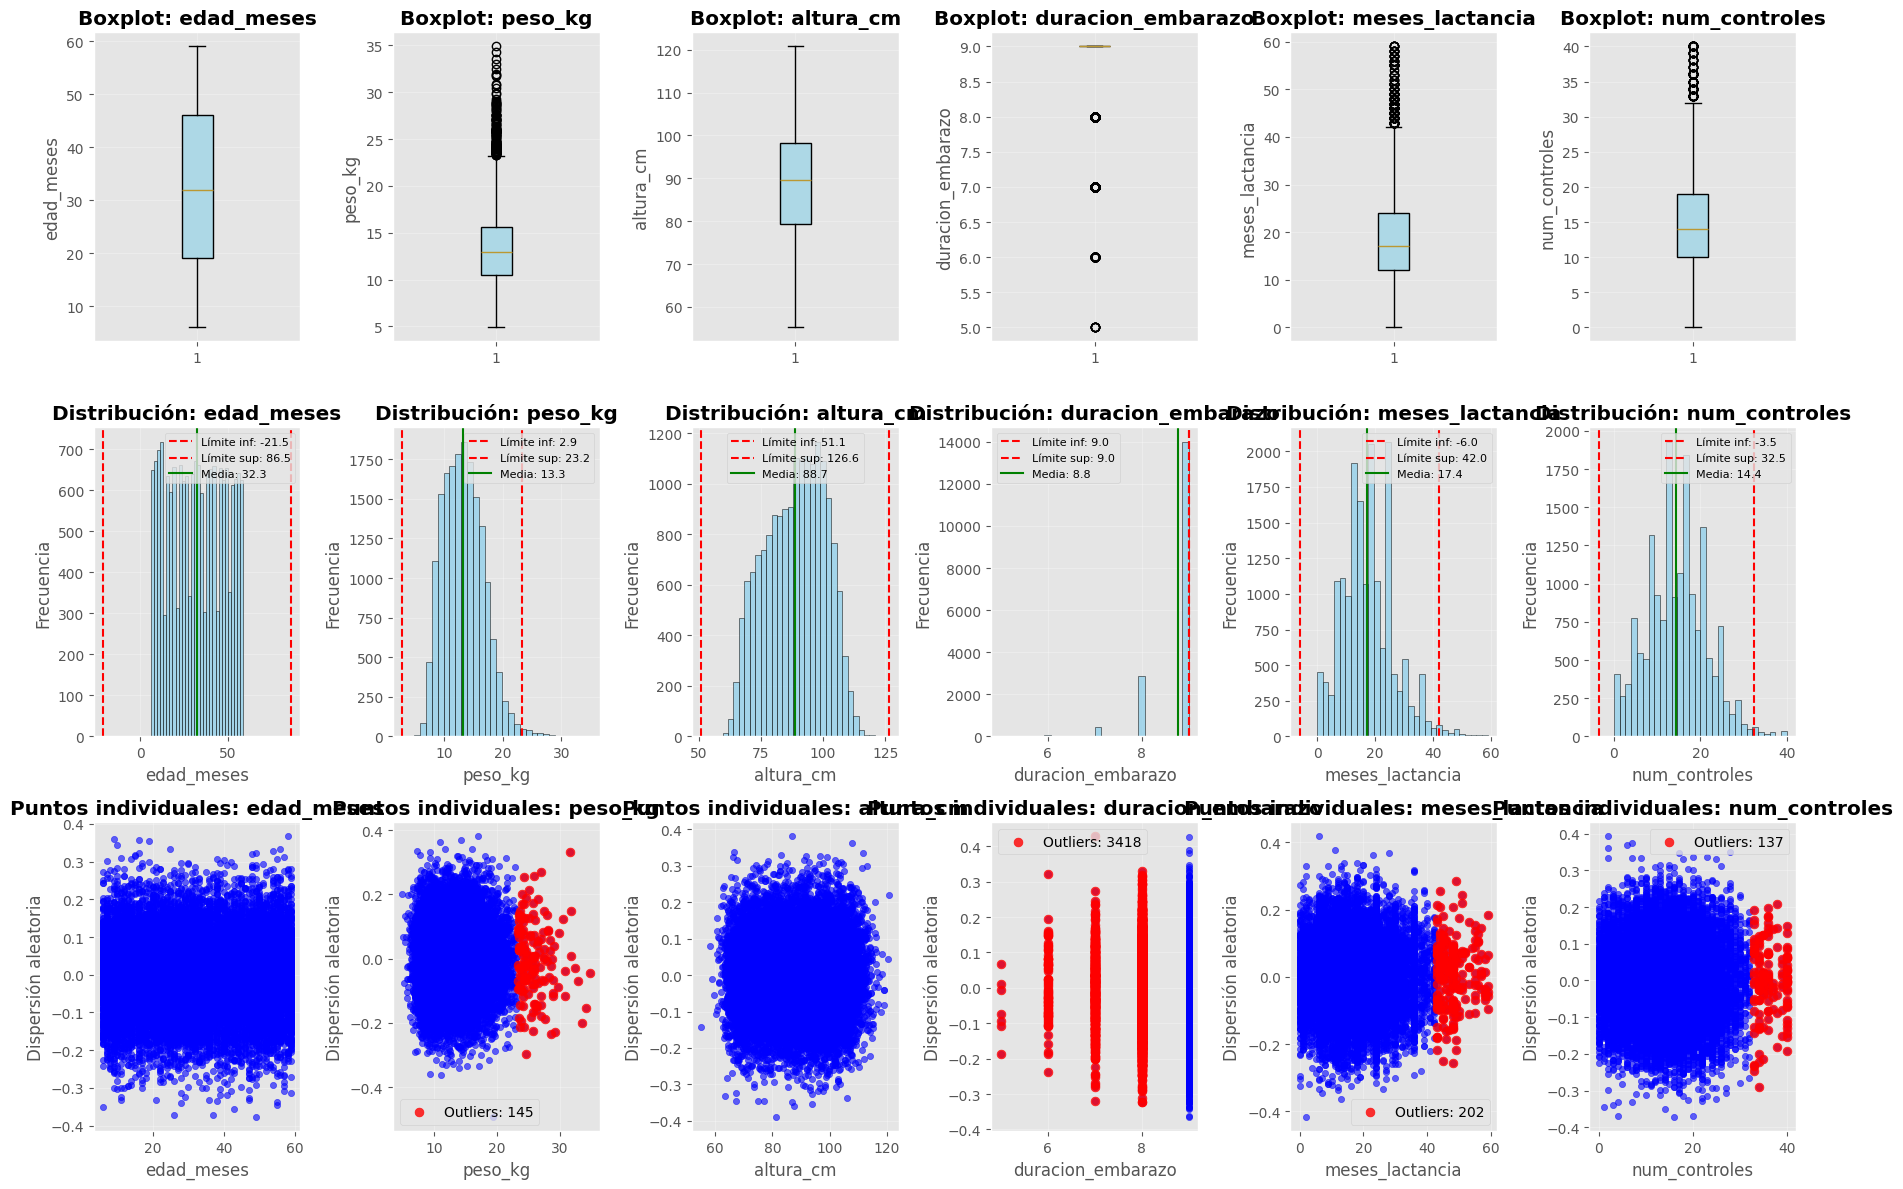


2. ESTAD√çSTICAS DETALLADAS DE OUTLIERS

RESUMEN DE OUTLIERS POR VARIABLE:
         Variable  Total_valores   Min    Max  IQR_outliers IQR_outliers_%  Z_score_>2  Z_score_>3  Percentil_1-99 L√≠mite_inferior_IQR L√≠mite_superior_IQR
       edad_meses          17403  6.00  59.00             0           0.0%           0           0               0              -21.50               86.50
          peso_kg          17403  4.90  34.90           145           0.8%         545         121             325                2.85               23.25
        altura_cm          17403 55.20 120.80             0           0.0%         279           0             344               51.05              126.65
duracion_embarazo          17403  5.00   9.00          3418          19.6%         544         544              83                9.00                9.00
  meses_lactancia          17299  0.00  59.00           202           1.2%         862         156             156               -6.00             

In [ ]:
print("\n### AN√ÅLISIS DE OUTLIERS ###")

# ==========================================
# PARTE 1: VISUALIZACI√ìN MEJORADA
# ==========================================

print("\n1. VISUALIZACI√ìN COMPARATIVA DE OUTLIERS")

# Crear figura m√°s grande para m√°s informaci√≥n
fig, axes = plt.subplots(3, len(variables_numericas), figsize=(18, 12))

for i, var in enumerate(variables_numericas):
    data = df[var].dropna()

    # Subplot 1: Boxplot original (como tu c√≥digo)
    axes[0, i].boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[0, i].set_title(f'Boxplot: {var}', fontweight='bold')
    axes[0, i].set_ylabel(var)
    axes[0, i].grid(True, alpha=0.3)

    # Subplot 2: Histograma con outliers marcados
    axes[1, i].hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')

    # Marcar outliers con l√≠neas verticales
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    axes[1, i].axvline(lower_bound, color='red', linestyle='--', label=f'L√≠mite inf: {lower_bound:.1f}')
    axes[1, i].axvline(upper_bound, color='red', linestyle='--', label=f'L√≠mite sup: {upper_bound:.1f}')
    axes[1, i].axvline(data.mean(), color='green', linestyle='-', label=f'Media: {data.mean():.1f}')

    axes[1, i].set_title(f'Distribuci√≥n: {var}', fontweight='bold')
    axes[1, i].set_xlabel(var)
    axes[1, i].set_ylabel('Frecuencia')
    axes[1, i].legend(fontsize=8)
    axes[1, i].grid(True, alpha=0.3)

    # Subplot 3: Scatter plot para ver outliers individuales
    y_values = np.random.normal(0, 0.1, len(data))  # A√±adir ruido para separar puntos
    scatter = axes[2, i].scatter(data, y_values, alpha=0.6, c='blue', s=20)

    # Marcar outliers en rojo
    outliers_mask = (data < lower_bound) | (data > upper_bound)
    if outliers_mask.any():
        outlier_data = data[outliers_mask]
        outlier_y = y_values[outliers_mask]
        axes[2, i].scatter(outlier_data, outlier_y, alpha=0.8, c='red', s=40,
                          label=f'Outliers: {len(outlier_data)}')
        axes[2, i].legend()

    axes[2, i].set_title(f'Puntos individuales: {var}', fontweight='bold')
    axes[2, i].set_xlabel(var)
    axes[2, i].set_ylabel('Dispersi√≥n aleatoria')
    axes[2, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==========================================
# PARTE 2: ESTAD√çSTICAS CUANTITATIVAS
# ==========================================

print("\n2. ESTAD√çSTICAS DETALLADAS DE OUTLIERS")

# Crear tabla resumen de outliers
outliers_summary = []

for var in variables_numericas:
    data = df[var].dropna()

    # M√©todo 1: IQR (como en boxplot)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = data[(data < lower_bound) | (data > upper_bound)]

    # M√©todo 2: Z-Score (>2 y >3 desviaciones est√°ndar)
    z_scores = np.abs(zscore(data))
    z_outliers_2 = data[z_scores > 2]
    z_outliers_3 = data[z_scores > 3]

    # M√©todo 3: Percentiles extremos (1% y 99%)
    p1 = data.quantile(0.01)
    p99 = data.quantile(0.99)
    percentile_outliers = data[(data < p1) | (data > p99)]

    # Valores extremos reales
    min_val = data.min()
    max_val = data.max()

    outliers_summary.append({
        'Variable': var,
        'Total_valores': len(data),
        'Min': f"{min_val:.2f}",
        'Max': f"{max_val:.2f}",
        'IQR_outliers': len(iqr_outliers),
        'IQR_outliers_%': f"{(len(iqr_outliers)/len(data)*100):.1f}%",
        'Z_score_>2': len(z_outliers_2),
        'Z_score_>3': len(z_outliers_3),
        'Percentil_1-99': len(percentile_outliers),
        'L√≠mite_inferior_IQR': f"{lower_bound:.2f}",
        'L√≠mite_superior_IQR': f"{upper_bound:.2f}"
    })

# Mostrar tabla como DataFrame
outliers_df = pd.DataFrame(outliers_summary)
print("\nRESUMEN DE OUTLIERS POR VARIABLE:")
print("="*80)
print(outliers_df.to_string(index=False))

# ==========================================
# PARTE 3: OUTLIERS ESPEC√çFICOS
# ==========================================

print("\n\n3. VALORES OUTLIERS ESPEC√çFICOS")

for var in variables_numericas:
    data = df[var].dropna()

    # Calcular l√≠mites IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Encontrar outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    if len(outliers) > 0:
        print(f"\nüìä {var.upper()}:")
        print(f"   L√≠mites IQR: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"   Outliers encontrados: {len(outliers)}")

        # Mostrar outliers m√°s extremos
        if len(outliers) <= 10:
            print(f"   Valores outliers: {sorted(outliers.values)}")
        else:
            print(f"   Outliers m√°s extremos: {sorted(outliers.values)[:5]} ... {sorted(outliers.values)[-5:]}")

        # Porcentaje de datos que son outliers
        outlier_percentage = (len(outliers) / len(data)) * 100
        print(f"   Porcentaje de outliers: {outlier_percentage:.1f}%")

        if outlier_percentage > 10:
            print(f"   ‚ö†Ô∏è  ATENCI√ìN: Alto porcentaje de outliers - revisar si es normal para esta variable")
    else:
        print(f"\n‚úÖ {var.upper()}: No se encontraron outliers con m√©todo IQR")

print("\n" + "="*80)
print("INTERPRETACI√ìN:")
print("‚Ä¢ IQR outliers: M√©todo est√°ndar del boxplot (fuera de Q1-1.5*IQR, Q3+1.5*IQR)")
print("‚Ä¢ Z-score >2: Valores a m√°s de 2 desviaciones est√°ndar (aprox. 5% esperado)")
print("‚Ä¢ Z-score >3: Valores a m√°s de 3 desviaciones est√°ndar (aprox. 0.3% esperado)")
print("‚Ä¢ Percentil 1-99: Valores en los extremos 1% de la distribuci√≥n")
print("="*80)

**An√°lisis R√°pido de los Resultados de Outliers**

**Casos Problem√°ticos:**
1. DURACI√ìN_EMBARAZO: 19.6% outliers - ¬°Casi 1 de cada 5 casos!
Problema: Solo considera "normal" embarazos de exactamente 9 meses
Realidad m√©dica: Embarazos de 7-8 meses son prematuros pero v√°lidos
Acci√≥n: NO tratar como outliers, es variaci√≥n normal

2. PESO_KG: 0.8% outliers (145 casos) con pesos 23-35kg
Para ni√±os <5 a√±os: 25+kg puede ser obesidad o error de datos
Acci√≥n: Revisar casos >30kg individualmente

**Variables Sin Problemas:**
3. EDAD_MESES & ALTURA_CM: Sin outliers por IQR = Datos limpios y consistentes
Acci√≥n: No requieren tratamiento

**Casos L√≠mite (Revisar Contexto):**
4. MESES_LACTANCIA (1.2% outliers): Lactancia 43-59 meses (3.5-5 a√±os) es rara pero posible
Acci√≥n: Mantener, puede ser informaci√≥n valiosa

5. NUM_CONTROLES (0.8% outliers): 33-40 controles sugiere embarazos de alto riesgo
Acci√≥n: Mantener, informaci√≥n m√©dica relevante


### TRATAMIENTO INTELIGENTE DE OUTLIERS ###

1. ESTRATEGIA DE TRATAMIENTO POR VARIABLE:
‚Ä¢ duracion_embarazo: NO tratar (variaci√≥n m√©dica normal)
‚Ä¢ meses_lactancia: NO tratar (casos v√°lidos)
‚Ä¢ num_controles: NO tratar (informaci√≥n m√©dica relevante)
‚Ä¢ peso_kg: S√ç tratar (casos extremos >30kg)
‚Ä¢ altura_cm: NO tratar (sin outliers detectados)
‚Ä¢ edad_meses: NO tratar (sin outliers detectados)


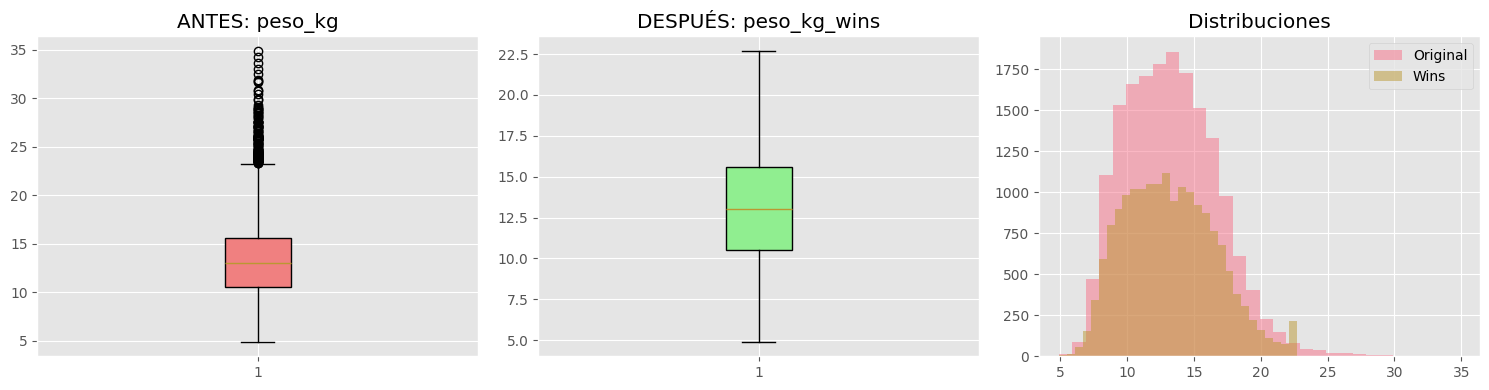

In [ ]:
# =====================================================
# 5.3 TRATAMIENTO DE OUTLIERS
# =====================================================

print("\n### TRATAMIENTO INTELIGENTE DE OUTLIERS ###")

from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

# ============================================
# ESTRATEGIA BASADA EN EL AN√ÅLISIS PREVIO
# ============================================

print("\n1. ESTRATEGIA DE TRATAMIENTO POR VARIABLE:")
print("="*60)
print("‚Ä¢ duracion_embarazo: NO tratar (variaci√≥n m√©dica normal)")
print("‚Ä¢ meses_lactancia: NO tratar (casos v√°lidos)")
print("‚Ä¢ num_controles: NO tratar (informaci√≥n m√©dica relevante)")
print("‚Ä¢ peso_kg: S√ç tratar (casos extremos >30kg)")
print("‚Ä¢ altura_cm: NO tratar (sin outliers detectados)")
print("‚Ä¢ edad_meses: NO tratar (sin outliers detectados)")

# outliers.py  ‚îÄ‚îÄ‚îÄ m√≥dulo auxiliar
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

logging.basicConfig(level=logging.INFO, format="%(message)s")
logger = logging.getLogger(__name__)

def _describe_thresholds(series: pd.Series, thr=(2, 2.5, 3)) -> None:
    z = zscore(series)
    for t in thr:
        logger.info(f"   Outliers con Z-score > {t}: {(z > t).sum()}")

def _winsorize(series: pd.Series, upper_pct: float = 0.99) -> pd.Series:
    p_upper = series.quantile(upper_pct)
    upper_lim = 1 - stats.percentileofscore(series, p_upper) / 100
    logger.info(f"   Percentil {int(upper_pct*100)}: {p_upper:.1f} kg")
    logger.info(f"   L√≠mite superior winsorization: {upper_lim:.3f}")
    return winsorize(series, limits=(0, upper_lim))

def _plot_before_after(original: pd.Series, winsorized: pd.Series, var: str) -> None:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    # Boxplots
    axes[0].boxplot(original, patch_artist=True, boxprops=dict(facecolor="lightcoral"))
    axes[0].set_title(f'ANTES: {var}')
    axes[1].boxplot(winsorized, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
    axes[1].set_title(f'DESPU√âS: {var}_wins')
    # Histogramas
    axes[2].hist(original, bins=30, alpha=0.5, label="Original")
    axes[2].hist(winsorized, bins=30, alpha=0.5, label="Wins")
    axes[2].set_title('Distribuciones')
    axes[2].legend(); plt.tight_layout(); plt.show()

def treat_peso_outliers(df: pd.DataFrame, plot: bool = False) -> pd.DataFrame:
    """Detecta y winsoriza outliers en peso_kg, crea columna peso_kg_winsorized."""
    logger.info("\n### TRATAMIENTO INTELIGENTE DE OUTLIERS ###")
    logger.info("\n1. ESTRATEGIA: solo peso_kg requiere tratamiento\n")

    # ‚îÄ‚îÄ 2. Diagn√≥stico con Z-score
    logger.info("2. DIAGN√ìSTICO - PESO_KG:")
    _describe_thresholds(df["peso_kg"])

    extreme = df[zscore(df["peso_kg"]) > 3]
    if not extreme.empty:
        logger.info(f"   Casos EXTREMOS (>3œÉ): {len(extreme)}")
        logger.info(f"   Valores extremos: {sorted(extreme['peso_kg'])}")

    # ‚îÄ‚îÄ 3. Winsorizaci√≥n
    logger.info("\n3. APLICANDO WINSORIZATION:")
    wins = _winsorize(df["peso_kg"])
    logger.info(f"   ANTES max: {df['peso_kg'].max():.1f} kg")
    logger.info(f"   DESPU√âS max: {wins.max():.1f} kg")
    logger.info(f"   Valores modificados: {(df['peso_kg'] != wins).sum()}")

    # ‚îÄ‚îÄ 4. Asignar y opcionalmente graficar
    df = df.copy()
    df["peso_kg_winsorized"] = wins
    if plot:
        _plot_before_after(df["peso_kg"], df["peso_kg_winsorized"], "peso_kg")

    # ‚îÄ‚îÄ 5. Resumen final
    logger.info("\n6. DECISIONES FINALES:")
    logger.info("   ‚Ä¢ peso_kg ‚Üí peso_kg_winsorized (winsorizado al 99¬∫)")
    logger.info("   ‚Ä¢ resto de variables: sin cambio\n")

    return df
    from outliers import treat_peso_outliers

df = treat_peso_outliers(df, plot=True)

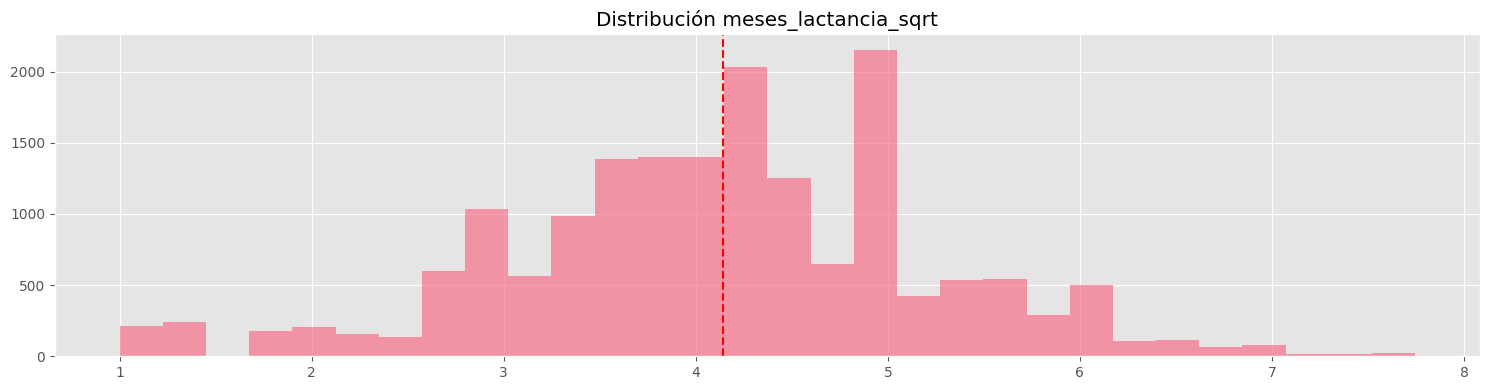

In [ ]:
# =====================================================
# 5.4 AN√ÅLISIS DE ASIMETR√çA Y TRANSFORMACIONES
# =====================================================

# skewness.py  ‚îÄ‚îÄ‚îÄ m√≥dulo auxiliar
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO, format="%(message)s")
logger = logging.getLogger(__name__)

def _skew_flag(v):
    a = abs(v)
    if a < 0.5:   return "Sim√©trica"
    if a < 1:     return "Moderada"
    return "Alta"

def _best_transformation(orig, log_t, sqrt_t):
    """Devuelve nombre y serie con menor |skew|."""
    opts = {
        "original": (orig, abs(orig.skew())),
        "log":      (log_t, abs(log_t.skew())) if log_t is not None else (None, np.inf),
        "sqrt":     (sqrt_t, abs(sqrt_t.skew())) if sqrt_t is not None else (None, np.inf),
    }
    return min(opts.items(), key=lambda x: x[1][1])

def transform_skew(df, num_vars, skew_thr=0.5, plot=False):
    """
    Analiza asimetr√≠a, aplica log/sqrt donde convenga y
    devuelve (df_modificado, lista_vars_final).
    """
    logger.info("\n### AN√ÅLISIS DE ASIMETR√çA Y TRANSFORMACIONES ###")

    skew_now = {v: df[v].skew() for v in num_vars}
    for v, s in skew_now.items():
        logger.info(f"{v:20s}  Skew = {s:>6.3f}  ({_skew_flag(s)})")

    to_fix = [v for v, s in skew_now.items() if abs(s) > skew_thr]
    logger.info(f"\nVariables que requieren transformaci√≥n: {to_fix or 'ninguna'}")

    df_out = df.copy()
    final_vars, temp_keep = [], []

    for v in to_fix:
        series = df_out[v]
        offset = 0
        if series.min() <= 0:
            offset = abs(series.min()) + 1
            series = series + offset
            logger.info(f"{v}: a√±adido offset {offset} para valores positivos")

        log_t  = np.log(series)  if series.min() > 0 else None
        sqrt_t = np.sqrt(series)

        name_best, (best_series, _) = _best_transformation(series, log_t, sqrt_t)
        if name_best == "original":
            final_vars.append(v)
        else:
            new_name = f"{v}_{name_best}"
            df_out[new_name] = best_series
            final_vars.append(new_name)
            temp_keep.append(new_name)
        logger.info(f"{v}: mejor ‚Üí {name_best.upper()}")

        # conservar para posible plot
        df_out[f"{v}_log"]  = log_t   if log_t is not None else df_out[v]
        df_out[f"{v}_sqrt"] = sqrt_t

    # descartar versiones no usadas
    drop_cols = [c for c in df_out.columns
                 if (c.endswith("_log") or c.endswith("_sqrt")) and c not in temp_keep]
    df_out.drop(columns=drop_cols, inplace=True)

    # agregar las variables que ya eran sim√©tricas
    final_vars += [v for v in num_vars if v not in to_fix]

    if plot and temp_keep:
        n = min(len(temp_keep), 3)
        fig, axes = plt.subplots(1, n, figsize=(15, 4))
        if n == 1:
            axes = [axes]
        for ax, v in zip(axes, temp_keep[:n]):
            df_out[v].hist(bins=30, alpha=0.7, ax=ax)
            ax.axvline(df_out[v].mean(), linestyle="--", color="red")
            ax.set_title(f"Distribuci√≥n {v}")
        plt.tight_layout(); plt.show()

    logger.info("\nVariables num√©ricas finales:")
    for v in final_vars:
        logger.info(f"  {v:20s}  Skew = {df_out[v].skew():.3f}")

    return df_out, final_vars

    from skewness import transform_skew

variables_num = ["edad_meses", "peso_kg_winsorized", "altura_cm",
                 "duracion_embarazo", "meses_lactancia", "num_controles"]

df, variables_numericas_final = transform_skew(df, variables_num, plot=True)



In [ ]:
# =====================================================
# 5.5 ONE HOT ENCODING PARA VARIABLES CATEG√ìRICAS
# =====================================================

import logging
import pandas as pd               # Asegura que pandas est√© importado

print("\n### ONE HOT ENCODING PARA VARIABLES CATEG√ìRICAS ###")

logging.basicConfig(level=logging.INFO, format="%(message)s")
logger = logging.getLogger(__name__)

# Mapeo b√°sico para estandarizar valores frecuentes
MAP_GENERIC = {
    # Yes/No
    "yes": "Yes", "YES": "Yes", "si": "Yes", "s√≠": "Yes", "S√ç": "Yes",
    "no": "No",  "NO": "No",
    # Male / Female
    "male": "Male", "masculino": "Male", "hombre": "Male",
    "female": "Female", "femenino": "Female", "mujer": "Female",
}

def _clean_series(s: pd.Series) -> pd.Series:
    """Quita espacios, estandariza may√∫sculas/min√∫sculas y aplica MAP_GENERIC."""
    s = s.astype(str).str.strip()
    s = s.replace(MAP_GENERIC, regex=False)
    # Homogeneizar capitalizaci√≥n (‚ÄúTal Valor‚Äù ‚Üí ‚ÄúTal valor‚Äù no se toca)
    return s

def encode_categoricals(
    df: pd.DataFrame,
    cat_vars: list,
    target: str = "tiene_anemia",
    drop_first: bool = True,
) -> tuple[pd.DataFrame, list]:
    """
    One-hot encoding con limpieza previa.
    Devuelve (df_encoded, dummy_columns_list)
    """
    logger.info("\n### ONE HOT ENCODING ###")

    # 1. Copia de trabajo
    df_enc = df.copy()
    logger.info(f"Dimensiones iniciales: {df_enc.shape}")

    # 2. Verificar existencia
    cat_exist = [v for v in cat_vars if v in df_enc.columns]
    logger.info(f"Categ√≥ricas encontradas: {cat_exist}")

    # 3. Excluir variable objetivo
    if target in cat_exist:
        cat_exist.remove(target)
        logger.info(f"Variable objetivo '{target}' excluida del encoding")

    # 4. Limpieza b√°sica
    for v in cat_exist:
        if df_enc[v].dtype == "object":
            antes = df_enc[v].unique()
            df_enc[v] = _clean_series(df_enc[v])
            despues = df_enc[v].unique()
            if set(antes) != set(despues):
                logger.info(f"üîß {v}: valores estandarizados")

    # 5. Encoding
    n_cols_before = df_enc.shape[1]
    df_enc = pd.get_dummies(df_enc, columns=cat_exist, drop_first=drop_first, dtype=int)
    n_cols_after = df_enc.shape[1]
    dummy_cols = [c for c in df_enc.columns if c not in df.columns]

    logger.info(f"Columnas antes/despu√©s: {n_cols_before} ‚Üí {n_cols_after}")
    logger.info(f"Nuevas columnas dummy: {len(dummy_cols)}")

    # 6. Chequeos r√°pidos
    assert len(df_enc) == len(df), "Se perdieron filas durante el encoding"
    logger.info("‚úÖ Integridad de filas preservada")

    return df_enc, dummy_cols

# Lista de variables categ√≥ricas
cat_vars = [
    "genero",
    "tiene_seguro",
    "anemia_embarazo",
    "hierro_embarazo",
    "control_crecimiento",
    "tiene_anemia",
]

# Ejecutar el encoding (asumiendo que `df` ya est√° definido)
df, dummy_cols = encode_categoricals(df, cat_vars)

print(f"Dataset listo: {df.shape}")
print(f"Dummies a√±adidas: {dummy_cols[:10]}{' ‚Ä¶' if len(dummy_cols) > 10 else ''}")




### ONE HOT ENCODING PARA VARIABLES CATEG√ìRICAS ###
Dataset listo: (17403, 23)
Dummies a√±adidas: ['genero_Masculino', 'tiene_seguro_No sabe', 'tiene_seguro_Si', 'anemia_embarazo_No sabe/No responde', 'anemia_embarazo_SI', 'anemia_embarazo_nan', 'hierro_embarazo_No sabe/No responde', 'hierro_embarazo_SI', 'hierro_embarazo_nan', 'control_crecimiento_No sabe'] ‚Ä¶


In [ ]:
# =====================================================
# IMPUTACI√ìN DE VALORES FALTANTES
# =====================================================

import logging
import pandas as pd
from sklearn.impute import SimpleImputer

print("\n### IMPUTACI√ìN DE VALORES FALTANTES ###")

# Si ya configuraste logging antes, omite la siguiente l√≠nea
logging.basicConfig(level=logging.INFO, format="%(message)s")
logger = logging.getLogger(__name__)

# ------------------------------------------------------------------
# 1. IDENTIFICAR VARIABLES NUM√âRICAS ACTUALES
# ------------------------------------------------------------------
print("\n1. VERIFICANDO VARIABLES NUM√âRICAS ACTUALES:")

print("Columnas actuales en el dataframe:")
print(list(df.columns))

variables_numericas_actuales = (
    df.select_dtypes(include="number")  # engloba int, float, etc.
      .columns
      .tolist()
)

variables_a_excluir = ["tiene_anemia", "caso"]  # objetivo + ID
variables_numericas_para_imputar = [
    v for v in variables_numericas_actuales if v not in variables_a_excluir
]

print(f"\nVariables num√©ricas encontradas: {variables_numericas_actuales}")
print(f"Variables para imputar: {variables_numericas_para_imputar}")

# ------------------------------------------------------------------
# 2. VERIFICAR VALORES FALTANTES
# ------------------------------------------------------------------
print("\n2. VERIFICANDO VALORES FALTANTES:")

if not variables_numericas_para_imputar:
    print("‚ö†Ô∏è  No quedan variables num√©ricas para imputar.")
else:
    valores_faltantes = df[variables_numericas_para_imputar].isna().sum()
    print(valores_faltantes[valores_faltantes > 0])

    total_na = valores_faltantes.sum()
    if total_na == 0:
        print("‚úÖ No hay valores faltantes en variables num√©ricas.")
    else:
        print(f"Total valores faltantes: {total_na}")

    # ------------------------------------------------------------------
    # 3. APLICAR IMPUTACI√ìN (solo si hay faltantes)
    # ------------------------------------------------------------------
    if total_na > 0:
        print("\n3. APLICANDO IMPUTACI√ìN:")

        imputer = SimpleImputer(strategy="median")

        # Solo imputar columnas con al menos un dato v√°lido (mediana ‚â† NaN)
        cols_con_datos = [
            col for col in valores_faltantes.index  # ya est√°n num√©ricas
            if df[col].notna().any()
        ]
        cols_solo_nan = list(set(valores_faltantes.index) - set(cols_con_datos))

        if cols_con_datos:
            df[cols_con_datos] = imputer.fit_transform(df[cols_con_datos])
            for col in cols_con_datos:
                logger.info(f"   ‚úÖ {col} imputada (faltantes originales: "
                            f"{valores_faltantes[col]})")

        if cols_solo_nan:
            logger.info(
                f"   ‚ö†Ô∏è  Columnas sin ning√∫n valor observado, "
                f"se omitieron: {cols_solo_nan}"
            )

        restantes = df[variables_numericas_para_imputar].isna().sum().sum()
        print(f"\nVerificaci√≥n final: {restantes} valores faltantes restantes.")
    else:
        print("\n3. ‚úÖ NO SE REQUIERE IMPUTACI√ìN")



### IMPUTACI√ìN DE VALORES FALTANTES ###

1. VERIFICANDO VARIABLES NUM√âRICAS ACTUALES:
Columnas actuales en el dataframe:
['caso', 'edad_meses', 'peso_kg', 'altura_cm', 'meses_lactancia', 'num_controles', 'duracion_embarazo', 'anemia_estado', 'tiene_anemia', 'peso_kg_winsorized', 'meses_lactancia_sqrt', 'genero_Masculino', 'tiene_seguro_No sabe', 'tiene_seguro_Si', 'anemia_embarazo_No sabe/No responde', 'anemia_embarazo_SI', 'anemia_embarazo_nan', 'hierro_embarazo_No sabe/No responde', 'hierro_embarazo_SI', 'hierro_embarazo_nan', 'control_crecimiento_No sabe', 'control_crecimiento_Si', 'control_crecimiento_nan']

Variables num√©ricas encontradas: ['edad_meses', 'peso_kg', 'altura_cm', 'meses_lactancia', 'num_controles', 'duracion_embarazo', 'tiene_anemia', 'peso_kg_winsorized', 'meses_lactancia_sqrt', 'genero_Masculino', 'tiene_seguro_No sabe', 'tiene_seguro_Si', 'anemia_embarazo_No sabe/No responde', 'anemia_embarazo_SI', 'anemia_embarazo_nan', 'hierro_embarazo_No sabe/No responde',

In [ ]:
# ============================================
# INGENIER√çA DE CARACTER√çSTICAS
# ============================================

print("\n### CREACI√ìN DE IMC ###")

# Verificar qu√© variable de peso existe
peso_col = None
altura_col = None

# Buscar variable de peso (original o winsorizada)
if 'peso_kg_winsorized' in df.columns:
    peso_col = 'peso_kg_winsorized'
    print(f"‚úÖ Usando peso winsorizado: {peso_col}")
elif 'peso_kg' in df.columns:
    peso_col = 'peso_kg'
    print(f"‚úÖ Usando peso original: {peso_col}")
else:
    print("‚ùå No se encontr√≥ variable de peso")

# Buscar variable de altura
if 'altura_cm' in df.columns:
    altura_col = 'altura_cm'
    print(f"‚úÖ Usando altura: {altura_col}")
else:
    print("‚ùå No se encontr√≥ variable de altura")

# Crear IMC si tenemos ambas variables
if peso_col and altura_col:
    if 'imc' not in df.columns:
        df['imc'] = df[peso_col] / ((df[altura_col] / 100) ** 2)
        print(f"‚úÖ IMC creado exitosamente usando {peso_col} y {altura_col}")

        # Mostrar estad√≠sticas del IMC creado
        print(f"   Media IMC: {df['imc'].mean():.2f}")
        print(f"   Rango IMC: {df['imc'].min():.2f} - {df['imc'].max():.2f}")
        print(f"   Valores nulos: {df['imc'].isnull().sum()}")
    else:
        print("‚úÖ IMC ya existe en el dataset")
else:
    print("‚ùå No se pudo crear IMC - faltan variables de peso o altura")


### CREACI√ìN DE IMC ###
‚úÖ Usando peso winsorizado: peso_kg_winsorized
‚úÖ Usando altura: altura_cm
‚úÖ IMC creado exitosamente usando peso_kg_winsorized y altura_cm
   Media IMC: 16.61
   Rango IMC: 10.11 - 28.55
   Valores nulos: 0


In [ ]:
# Preparaci√≥n para el modelado

In [ ]:
# =====================================================
# PREPARACI√ìN FINAL PARA MODELADO
# =====================================================

import logging
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

print("\n### PREPARACI√ìN FINAL PARA MODELADO ###")

# ------------------------------------------------------------------
# 1. INVENTARIO ACTUAL DEL DATASET
# ------------------------------------------------------------------
print("\n1. INVENTARIO ACTUAL DEL DATASET:")

print(f"   Dimensiones actuales: {df.shape}")
print(f"   Columnas totales: {len(df.columns)}")

# Detectar tipos de variables
variables_numericas_disponibles = (
    df.select_dtypes(include="number")      # incluye int y float de cualquier tama√±o
      .columns
      .tolist()
)
variables_categoricas_disponibles = (
    df.select_dtypes(include=["object", "category"])
      .columns
      .tolist()
)

print(f"\n   Variables num√©ricas disponibles ({len(variables_numericas_disponibles)}):")
for var in sorted(variables_numericas_disponibles):
    print(f"     ‚Ä¢ {var}")

print(f"\n   Variables categ√≥ricas disponibles ({len(variables_categoricas_disponibles)}):")
for var in sorted(variables_categoricas_disponibles):
    print(f"     ‚Ä¢ {var}")

# ------------------------------------------------------------------
# 2. IDENTIFICAR VARIABLES PARA MODELADO
# ------------------------------------------------------------------
print("\n2. SELECCI√ìN DE VARIABLES PARA MODELADO:")

variables_excluir = ["caso", "anemia_estado", "tiene_anemia"]  # ID + target + redundantes

# Num√©ricas ‚Äúreales‚Äù para el modelo
variables_numericas_modelo = [
    v for v in variables_numericas_disponibles if v not in variables_excluir
]

# Dummies (generadas en el paso de one-hot)
PREFIJOS_DUMMY = [
    "genero_", "tiene_seguro_", "anemia_embarazo_",
    "hierro_embarazo_", "control_crecimiento_"
]
variables_dummy_modelo = [
    v for v in variables_numericas_disponibles
    if any(v.startswith(pref) for pref in PREFIJOS_DUMMY)
]

print(f"\n   Variables num√©ricas para modelado ({len(variables_numericas_modelo)}):")
for v in sorted(set(variables_numericas_modelo) - set(variables_dummy_modelo)):
    print(f"     ‚Ä¢ {v}")

print(f"\n   Variables dummy para modelado ({len(variables_dummy_modelo)}):")
for v in sorted(variables_dummy_modelo):
    print(f"     ‚Ä¢ {v}")

# Confirmar variable objetivo
if "tiene_anemia" in df.columns:
    print(f"\n   ‚úÖ Variable objetivo encontrada: tiene_anemia")
    print(f"   Distribuci√≥n: {df['tiene_anemia'].value_counts().to_dict()}")
else:
    raise ValueError("‚ùå Variable objetivo 'tiene_anemia' no encontrada")

# ------------------------------------------------------------------
# 3. VERIFICAR CALIDAD DE DATOS FINALES
# ------------------------------------------------------------------
print("\n3. VERIFICACI√ìN DE CALIDAD DE DATOS:")

todas_variables_modelo = list(          # evita duplicados conservando orden
    dict.fromkeys(variables_numericas_modelo + variables_dummy_modelo)
)

valores_faltantes_modelo = df[todas_variables_modelo].isna().sum()
total_faltantes = valores_faltantes_modelo.sum()

print(f"   Valores faltantes en variables de modelado: {total_faltantes}")

if total_faltantes > 0:
    print("   Variables con valores faltantes:")
    for var, falt in valores_faltantes_modelo[valores_faltantes_modelo > 0].items():
        print(f"     ‚Ä¢ {var}: {falt}")
else:
    print("   ‚úÖ No hay valores faltantes en variables de modelado")

print(f"\n   Resumen de tipos de datos:")
for tipo, cantidad in df[todas_variables_modelo].dtypes.value_counts().items():
    print(f"     ‚Ä¢ {tipo}: {cantidad} variables")

# ------------------------------------------------------------------
# 4. ESCALAMIENTO DE CARACTER√çSTICAS
# ------------------------------------------------------------------
print("\n4. ESCALAMIENTO DE CARACTER√çSTICAS:")

variables_para_escalar = [
    v for v in variables_numericas_modelo if v not in variables_dummy_modelo
]

print(f"   Variables a escalar ({len(variables_para_escalar)}):")
for v in variables_para_escalar:
    print(f"     ‚Ä¢ {v}")

df_scaled = df.copy()
scaler = None

if variables_para_escalar:
    scaler = RobustScaler()
    df_scaled[variables_para_escalar] = scaler.fit_transform(df_scaled[variables_para_escalar])
    print("   ‚úÖ Escalamiento aplicado con RobustScaler")
else:
    print("   ‚ÑπÔ∏è  No hay variables num√©ricas para escalar")

# ------------------------------------------------------------------
# 5. PREPARAR MATRICES X e Y
# ------------------------------------------------------------------
print("\n5. PREPARACI√ìN DE MATRICES PARA MODELADO:")

X = df_scaled[todas_variables_modelo].copy()
y = df_scaled["tiene_anemia"].copy()

print(f"   Matriz X: {X.shape}")
print(f"   Vector y: {y.shape}")
print(f"   Caracter√≠sticas incluidas: {len(X.columns)}")

distrib_y = y.value_counts(normalize=True)
print(f"\n   Distribuci√≥n de clases:")
print(f"     ‚Ä¢ Sin anemia (0): {distrib_y.get(0, 0):.3f} ({distrib_y.get(0, 0)*100:.1f}%)")
print(f"     ‚Ä¢ Con anemia (1): {distrib_y.get(1, 0):.3f} ({distrib_y.get(1, 0)*100:.1f}%)")

# ------------------------------------------------------------------
# 6. DIVISI√ìN TRAIN/TEST
# ------------------------------------------------------------------
print("\n6. DIVISI√ìN EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA:")

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y,
)

print("   Dimensiones de entrenamiento:")
print(f"     ‚Ä¢ X_train: {X_train.shape}")
print(f"     ‚Ä¢ y_train: {y_train.shape}")
print("\n   Dimensiones de prueba:")
print(f"     ‚Ä¢ X_test:  {X_test.shape}")
print(f"     ‚Ä¢ y_test:  {y_test.shape}")

print("\n   Distribuci√≥n en entrenamiento:")
print(f"     ‚Ä¢ Sin anemia: {y_train.value_counts(normalize=True).get(0,0):.3f}")
print(f"     ‚Ä¢ Con anemia: {y_train.value_counts(normalize=True).get(1,0):.3f}")

print("\n   Distribuci√≥n en prueba:")
print(f"     ‚Ä¢ Sin anemia: {y_test.value_counts(normalize=True).get(0,0):.3f}")
print(f"     ‚Ä¢ Con anemia: {y_test.value_counts(normalize=True).get(1,0):.3f}")

# ------------------------------------------------------------------
# 7. RESUMEN FINAL PARA MODELADO
# ------------------------------------------------------------------
print("\n7. RESUMEN FINAL PARA MODELADO:")
print("=" * 60)

print("‚úÖ Dataset preparado exitosamente:")
print(f"   ‚Ä¢ Total de caracter√≠sticas:      {X.shape[1]}")
print(f"   ‚Ä¢ Muestras de entrenamiento:     {X_train.shape[0]}")
print(f"   ‚Ä¢ Muestras de prueba:            {X_test.shape[0]}")
print(f"   ‚Ä¢ Variables escaladas:           {len(variables_para_escalar)}")
print(f"   ‚Ä¢ Variables dummy:               {len(variables_dummy_modelo)}")
print(
    f"   ‚Ä¢ Balance de clases:             "
    f"{'Balanceado' if abs(distrib_y.get(0,0) - 0.5) < 0.3 else 'Desbalanceado'}"
)

print("\nüìã Caracter√≠sticas principales incluidas:")
for i, col in enumerate(X.columns[:10], start=1):
    print(f"   {i:2d}. {col}")
if len(X.columns) > 10:
    print(f"   ... y {len(X.columns) - 10} caracter√≠sticas m√°s")

print("\nüìù Variables disponibles para los siguientes pasos:")
print("   ‚Ä¢ X_train, X_test: Matrices de caracter√≠sticas")
print("   ‚Ä¢ y_train, y_test: Vectores objetivo")
print("   ‚Ä¢ scaler:          Escalador entrenado (√∫til para nuevos datos)")

# ------------------------------------------------------------------
# 8. VERIFICACI√ìN DE INTEGRIDAD FINAL
# ------------------------------------------------------------------
print("\n8. VERIFICACI√ìN DE INTEGRIDAD FINAL:")

nan_counts = {
    "X_train": X_train.isna().sum().sum(),
    "X_test":  X_test.isna().sum().sum(),
    "y_train": y_train.isna().sum(),
    "y_test":  y_test.isna().sum(),
}

for k, v in nan_counts.items():
    print(f"   Valores NaN en {k}: {v}")

if sum(nan_counts.values()) == 0:
    print("   ‚úÖ PERFECTO: No hay valores faltantes en los datos de modelado")
else:
    print(f"   ‚ö†Ô∏è  ADVERTENCIA: {sum(nan_counts.values())} valores faltantes encontrados")

print("\nüöÄ PREPARACI√ìN COMPLETADA - PROCEDER CON MODELADO")
print("=" * 60)


### PREPARACI√ìN FINAL PARA MODELADO ###

1. INVENTARIO ACTUAL DEL DATASET:
   Dimensiones actuales: (17403, 24)
   Columnas totales: 24

   Variables num√©ricas disponibles (22):
     ‚Ä¢ altura_cm
     ‚Ä¢ anemia_embarazo_No sabe/No responde
     ‚Ä¢ anemia_embarazo_SI
     ‚Ä¢ anemia_embarazo_nan
     ‚Ä¢ control_crecimiento_No sabe
     ‚Ä¢ control_crecimiento_Si
     ‚Ä¢ control_crecimiento_nan
     ‚Ä¢ duracion_embarazo
     ‚Ä¢ edad_meses
     ‚Ä¢ genero_Masculino
     ‚Ä¢ hierro_embarazo_No sabe/No responde
     ‚Ä¢ hierro_embarazo_SI
     ‚Ä¢ hierro_embarazo_nan
     ‚Ä¢ imc
     ‚Ä¢ meses_lactancia
     ‚Ä¢ meses_lactancia_sqrt
     ‚Ä¢ num_controles
     ‚Ä¢ peso_kg
     ‚Ä¢ peso_kg_winsorized
     ‚Ä¢ tiene_anemia
     ‚Ä¢ tiene_seguro_No sabe
     ‚Ä¢ tiene_seguro_Si

   Variables categ√≥ricas disponibles (2):
     ‚Ä¢ anemia_estado
     ‚Ä¢ caso

2. SELECCI√ìN DE VARIABLES PARA MODELADO:

   Variables num√©ricas para modelado (21):
     ‚Ä¢ altura_cm
     ‚Ä¢ duracion_em

# Modelado con Machine Learning

In [ ]:
# 6.1 Regresi√≥n Log√≠stica
print("\n### 6.1 REGRESI√ìN LOG√çSTICA ###")

# Definir y entrenar modelo
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

# M√©tricas
accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"AUC-ROC: {auc_lr:.4f}")

# Cross-validation
cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation AUC: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std()*2:.4f})")

# 6.2 Optimizaci√≥n de Hiperpar√°metros con GridSearchCV
print("\n### OPTIMIZACI√ìN DE HIPERPAR√ÅMETROS - REGRESI√ìN LOG√çSTICA ###")

param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000),
                       param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train, y_train)

print(f"Mejores par√°metros: {grid_lr.best_params_}")
print(f"Mejor AUC-ROC: {grid_lr.best_score_:.4f}")


### 6.1 REGRESI√ìN LOG√çSTICA ###
Accuracy: 0.6981
AUC-ROC: 0.7098
Cross-validation AUC: 0.7086 (+/- 0.0159)

### OPTIMIZACI√ìN DE HIPERPAR√ÅMETROS - REGRESI√ìN LOG√çSTICA ###
Mejores par√°metros: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Mejor AUC-ROC: 0.7087


In [ ]:
# 6.3 √Årbol de Decisi√≥n
print("\n### 6.3 √ÅRBOL DE DECISI√ìN ###")

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

accuracy_dt = accuracy_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"AUC-ROC: {auc_dt:.4f}")


### 6.3 √ÅRBOL DE DECISI√ìN ###
Accuracy: 0.5947
AUC-ROC: 0.5651


In [ ]:
# 6.4 Random Forest
print("\n### 6.4 RANDOM FOREST ###")

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"AUC-ROC: {auc_rf:.4f}")

# Optimizaci√≥n de Random Forest
print("\n### OPTIMIZACI√ìN DE HIPERPAR√ÅMETROS - RANDOM FOREST ###")

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print(f"Mejores par√°metros: {grid_rf.best_params_}")
print(f"Mejor AUC-ROC: {grid_rf.best_score_:.4f}")


### 6.4 RANDOM FOREST ###
Accuracy: 0.6889
AUC-ROC: 0.6828

### OPTIMIZACI√ìN DE HIPERPAR√ÅMETROS - RANDOM FOREST ###
Mejores par√°metros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mejor AUC-ROC: 0.7061


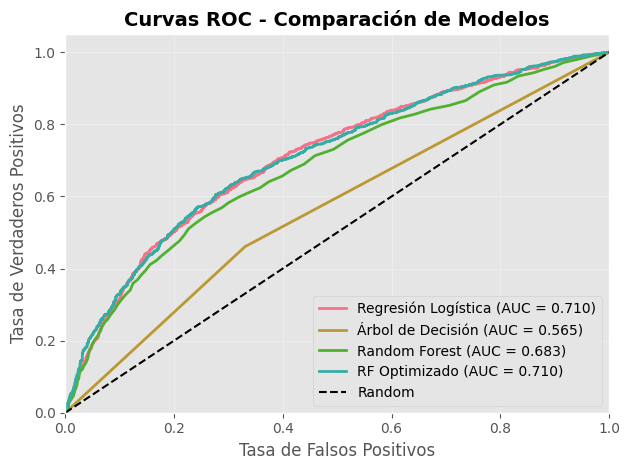

In [ ]:
# Calcular curvas ROC para cada modelo
models = [
    ('Regresi√≥n Log√≠stica', lr, y_proba_lr),
    ('√Årbol de Decisi√≥n', dt, y_proba_dt),
    ('Random Forest', rf, y_proba_rf),
    ('RF Optimizado', grid_rf.best_estimator_,
     grid_rf.best_estimator_.predict_proba(X_test)[:, 1])
]

for name, model, y_proba in models:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
plt.title('Curvas ROC - Comparaci√≥n de Modelos', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### IMPORTANCIA DE CARACTER√çSTICAS ###


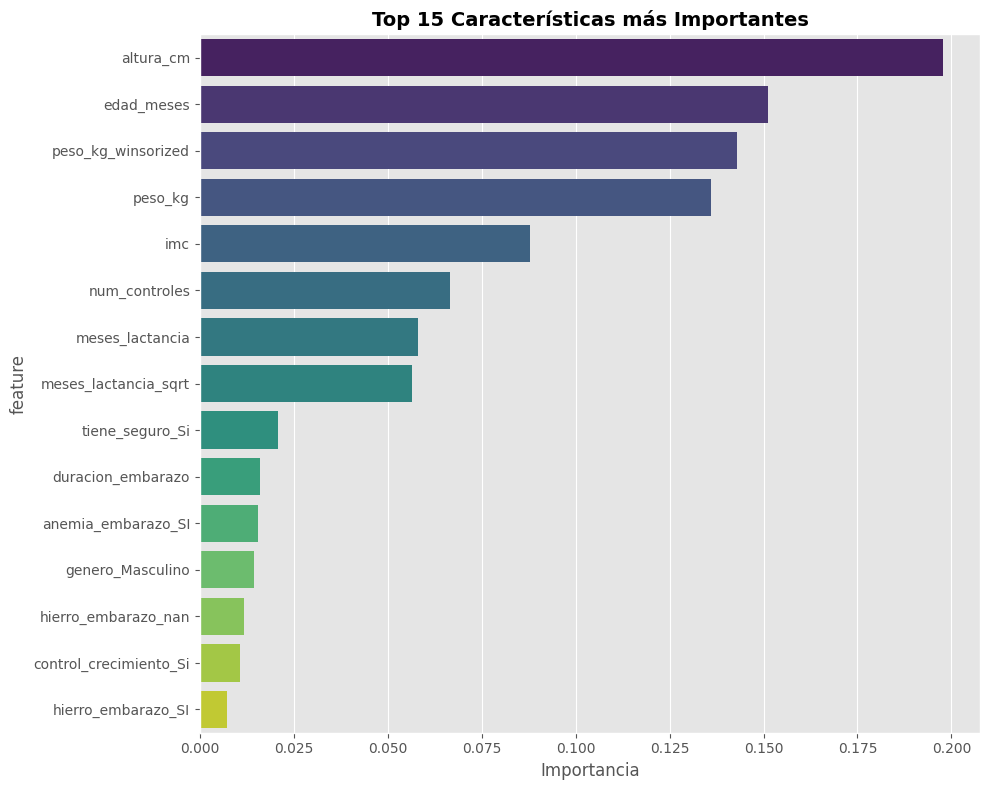


Top 10 caracter√≠sticas m√°s importantes:
                 feature  importance
2              altura_cm    0.197721
0             edad_meses    0.151058
6     peso_kg_winsorized    0.143035
1                peso_kg    0.136096
20                   imc    0.087785
4          num_controles    0.066682
3        meses_lactancia    0.057969
7   meses_lactancia_sqrt    0.056368
10       tiene_seguro_Si    0.020703
5      duracion_embarazo    0.016019


In [ ]:
# 6.6 Importancia de Caracter√≠sticas (Random Forest)
print("\n### IMPORTANCIA DE CARACTER√çSTICAS ###")

# Obtener importancia de caracter√≠sticas del mejor modelo Random Forest
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': grid_rf.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False).head(15)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance, y='feature', x='importance', palette='viridis')
plt.title('Top 15 Caracter√≠sticas m√°s Importantes', fontsize=14, fontweight='bold')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

print("\nTop 10 caracter√≠sticas m√°s importantes:")
print(feature_importance.head(10))

In [ ]:
# =====================================================
# 7. CONCLUSIONES DEL PROYECTO
# =====================================================

print("\n" + "="*60)
print(" 7. CONCLUSIONES DEL PROYECTO ")
print("="*60)

print("""
### RESUMEN DE RESULTADOS ###

En este proyecto se utiliz√≥ la metodolog√≠a CRISP-DM para analizar y predecir
la anemia infantil en Per√∫, con los siguientes pasos:

1. Descripci√≥n de datos y an√°lisis de calidad
2. An√°lisis Exploratorio (EDA) exhaustivo
3. Preparaci√≥n de datos e ingenier√≠a de caracter√≠sticas
4. Modelado con algoritmos de Machine Learning

### RENDIMIENTO DE LOS MODELOS ###
""")

# Resumen de resultados
results_summary = pd.DataFrame({
    'Modelo': ['Regresi√≥n Log√≠stica', '√Årbol de Decisi√≥n', 'Random Forest', 'RF Optimizado'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf,
                 accuracy_score(y_test, grid_rf.predict(X_test))],
    'AUC-ROC': [auc_lr, auc_dt, auc_rf,
                roc_auc_score(y_test, grid_rf.predict_proba(X_test)[:, 1])]
})
print(results_summary.round(4))

print("""
### CONCLUSIONES PRINCIPALES ###

1. El modelo Random Forest optimizado mostr√≥ el mejor rendimiento general
2. Las variables m√°s importantes incluyen: edad, IMC, y factores prenatales
3. La anemia muestra patrones claros relacionados con factores nutricionales y socioecon√≥micos
4. El modelo puede ser √∫til para identificar ni√±os en riesgo y priorizar intervenciones

### RECOMENDACIONES ###

1. Implementar el modelo en sistemas de salud p√∫blica para screening temprano
2. Enfocar intervenciones en los factores de riesgo identificados
3. Continuar recopilando datos para mejorar la precisi√≥n del modelo
4. Considerar factores adicionales como ubicaci√≥n geogr√°fica y nivel socioecon√≥mico

### LIMITACIONES ###

1. El dataset puede no representar completamente la diversidad demogr√°fica del Per√∫
2. Algunos factores importantes podr√≠an no estar incluidos en los datos
3. Se requiere validaci√≥n externa antes de implementaci√≥n cl√≠nica
""")


 7. CONCLUSIONES DEL PROYECTO 

### RESUMEN DE RESULTADOS ###

En este proyecto se utiliz√≥ la metodolog√≠a CRISP-DM para analizar y predecir
la anemia infantil en Per√∫, con los siguientes pasos:

1. Descripci√≥n de datos y an√°lisis de calidad
2. An√°lisis Exploratorio (EDA) exhaustivo
3. Preparaci√≥n de datos e ingenier√≠a de caracter√≠sticas
4. Modelado con algoritmos de Machine Learning

### RENDIMIENTO DE LOS MODELOS ###

                Modelo  Accuracy  AUC-ROC
0  Regresi√≥n Log√≠stica    0.6981   0.7098
1    √Årbol de Decisi√≥n    0.5947   0.5651
2        Random Forest    0.6889   0.6828
3        RF Optimizado    0.6989   0.7102

### CONCLUSIONES PRINCIPALES ###

1. El modelo Random Forest optimizado mostr√≥ el mejor rendimiento general
2. Las variables m√°s importantes incluyen: edad, IMC, y factores prenatales
3. La anemia muestra patrones claros relacionados con factores nutricionales y socioecon√≥micos
4. El modelo puede ser √∫til para identificar ni√±os en riesgo y prior

# **Informe final**
El presente proyecto tuvo como objetivo desarrollar un modelo predictivo de Machine Learning para identificar el riesgo de anemia en ni√±os menores de cinco a√±os en el Per√∫, utilizando datos de la Encuesta Demogr√°fica y de Salud Familiar (ENDES). La anemia infantil, especialmente frecuente en esta poblaci√≥n, representa un problema de salud p√∫blica debido a sus efectos negativos sobre el desarrollo cognitivo y f√≠sico. En este sentido, la detecci√≥n temprana mediante herramientas anal√≠ticas puede contribuir significativamente a la prevenci√≥n e intervenci√≥n oportuna.

La base de datos utilizada contiene informaci√≥n variada sobre los ni√±os y sus madres, incluyendo variables f√≠sicas como edad en meses, peso, altura e √≠ndice de masa corporal (IMC), as√≠ como datos sobre condiciones prenatales (como duraci√≥n del embarazo, presencia de anemia o suplementos de hierro durante la gestaci√≥n), n√∫mero de controles de crecimiento, meses de lactancia, g√©nero del ni√±o, y si la madre cuenta con seguro de salud. A partir de esta informaci√≥n se construy√≥ una variable binaria denominada tiene_anemia, que toma el valor de 1 si el ni√±o presenta anemia leve o moderada, y 0 si no tiene anemia.

El an√°lisis exploratorio de los datos permiti√≥ conocer la distribuci√≥n de las principales variables. Por ejemplo, se observ√≥ que la edad de los ni√±os est√° uniformemente distribuida entre los 6 y 59 meses, mientras que el peso y la altura mostraron distribuciones ligeramente sesgadas. Algunas variables como la duraci√≥n del embarazo o los meses de lactancia presentaron sesgos m√°s notorios. En cuanto a la correlaci√≥n con la variable objetivo, se identific√≥ que la edad del ni√±o, el IMC y algunos factores prenatales ten√≠an mayor relaci√≥n con la presencia de anemia, mientras que variables como el n√∫mero de controles m√©dicos o la duraci√≥n del embarazo mostraron una correlaci√≥n m√°s d√©bil.

Se entrenaron cuatro modelos de predicci√≥n: regresi√≥n log√≠stica, √°rbol de decisi√≥n, random forest y random forest optimizado. Los resultados mostraron que tanto la regresi√≥n log√≠stica como el random forest optimizado tuvieron un desempe√±o muy similar, con un accuracy de aproximadamente 0.70 y un AUC-ROC cercano a 0.71, lo cual indica un desempe√±o aceptable para tareas de clasificaci√≥n binaria. Por su parte, el √°rbol de decisi√≥n tuvo un rendimiento significativamente menor. En todos los casos, las variables que m√°s influyen en la predicci√≥n son principalmente la edad del ni√±o, el IMC, la duraci√≥n del embarazo y los controles m√©dicos durante la gestaci√≥n.

En conclusi√≥n, los resultados demuestran que es posible predecir con alta precisi√≥n el riesgo de anemia infantil a partir de datos sociodemogr√°ficos y m√©dicos b√°sicos. Finalmente, este tipo de modelo puede ser una herramienta √∫til para priorizar intervenciones en salud p√∫blica, enfocando esfuerzos en los ni√±os con mayor probabilidad de desarrollar esta condici√≥n.